In [1]:
%%capture
%reset -f                        # clear all variables from the workspace
'generic imports'
import os
import pandas as pd
import sys
import numpy as np
sys.path.append(os.path.abspath('..'))
from src import utils   
import datetime  
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_smote = pd.read_csv('../data/EdgeIIot_train_100k_RTB_balanced.csv', low_memory=False)
df_original = pd.read_csv('../data/EdgeIIot_train_100k.csv', low_memory=False)

In [3]:
# Count Attack_type in df_smote
df_smote['Attack_type'].value_counts()

Attack_type
DDoS_UDP                 100000
Password                 100000
DDoS_TCP                 100000
Backdoor                 100000
DDoS_ICMP                100000
Port_Scanning            100000
Vulnerability_scanner    100000
SQL_injection            100000
DDoS_HTTP                100000
Uploading                100000
XSS                      100000
Ransomware               100000
MITM                     100000
Fingerprinting           100000
Normal                   100000
Name: count, dtype: int64

In [4]:
def descriptive_statistics_side_by_side(data1, data2):
    desc_data1 = data1.describe()
    desc_data2 = data2.describe()
    
    # invert the table, columns as rows and rows as columns to make it easier to see on the screen
    desc_data1 = desc_data1.T
    desc_data2 = desc_data2.T    

    desc_data1 = desc_data1.style.set_caption("Descrição estatística para dados originais:")
    desc_data2 = desc_data2.style.set_caption("Descrição estatística para dados sintéticos:")
    
    # data aligne to the left
    desc_data1.set_properties(**{'text-align': 'left'})
    desc_data2.set_properties(**{'text-align': 'left'})
    
    # only 2 decimal places
    desc_data1 = desc_data1.format("{:.2f}")
    desc_data2 = desc_data2.format("{:.2f}") 
    
    
    return desc_data1, desc_data2

desc_data1, desc_data2 = descriptive_statistics_side_by_side(df_original, df_smote)

display(desc_data1)
display(desc_data2)

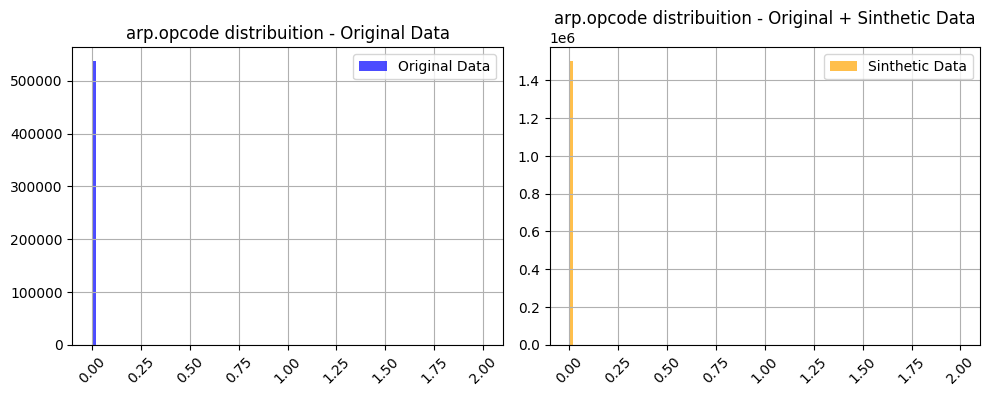

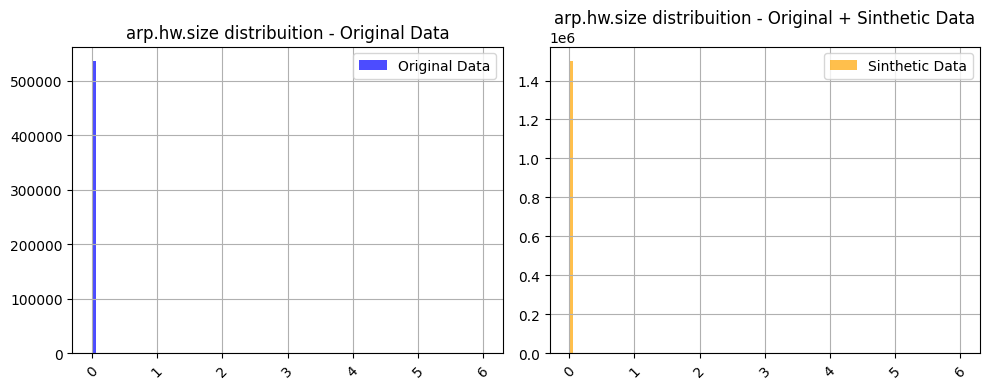

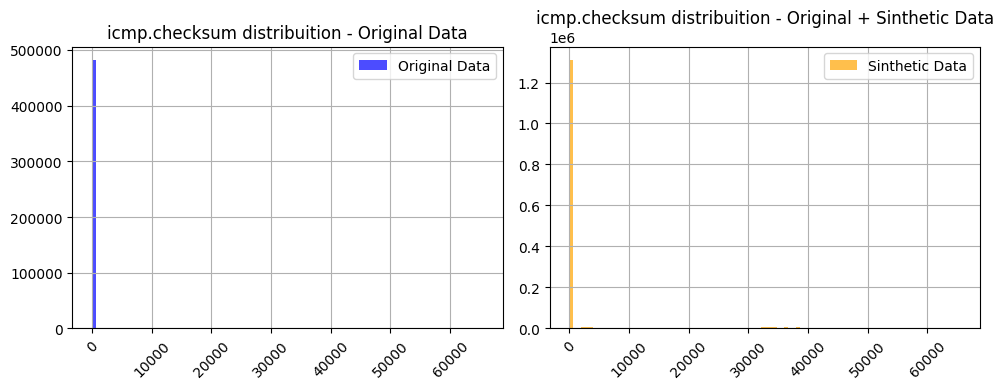

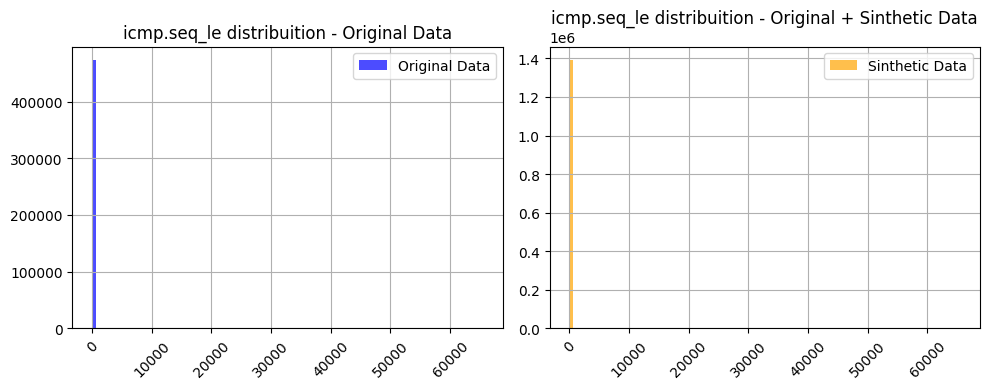

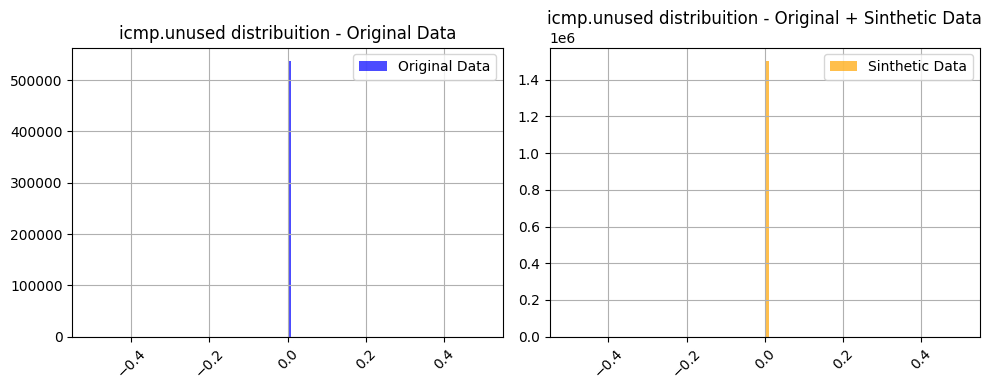

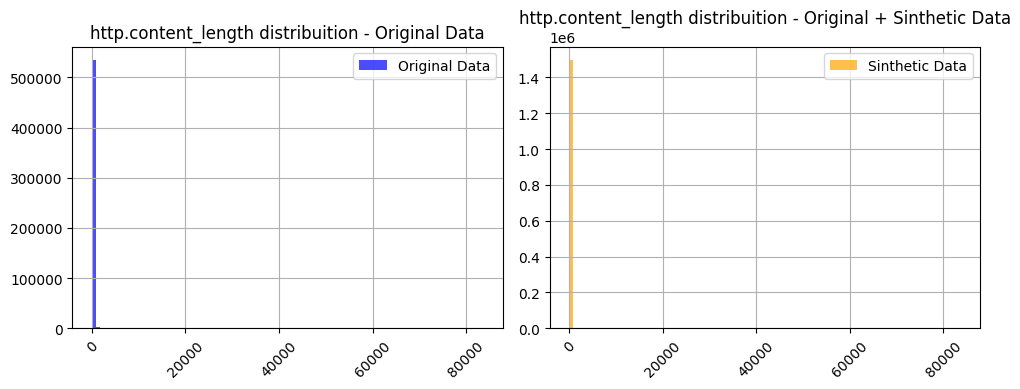

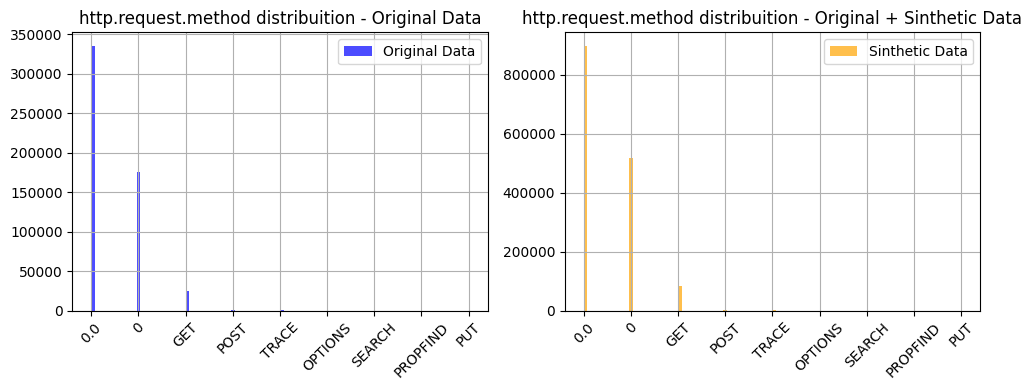

/tmp/ipykernel_122778/1581043500.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


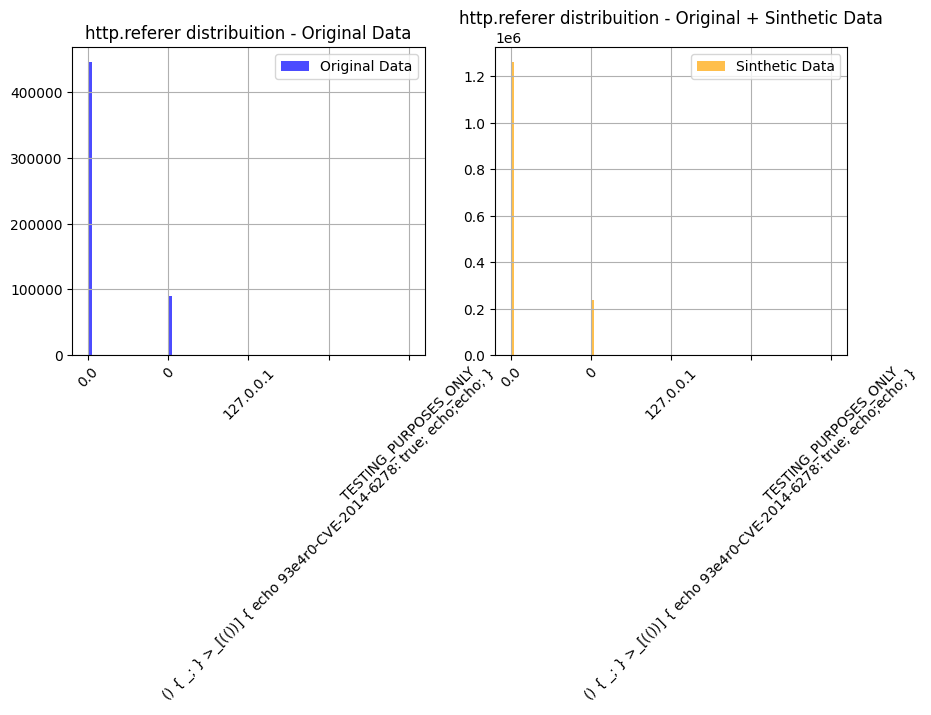

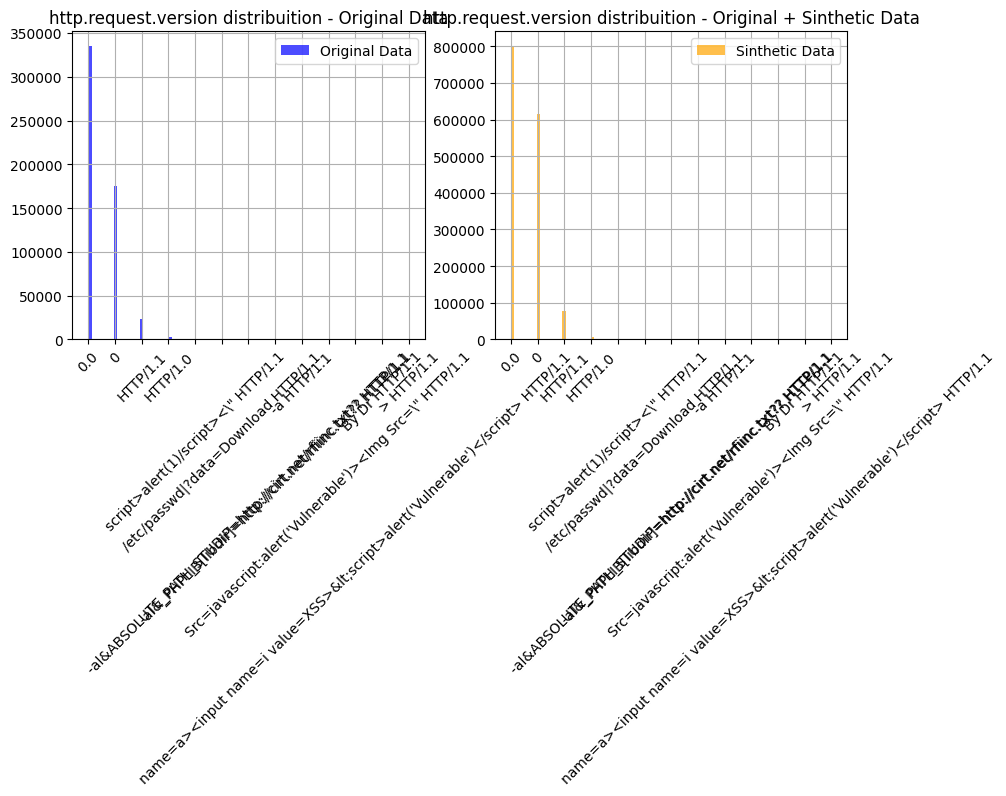

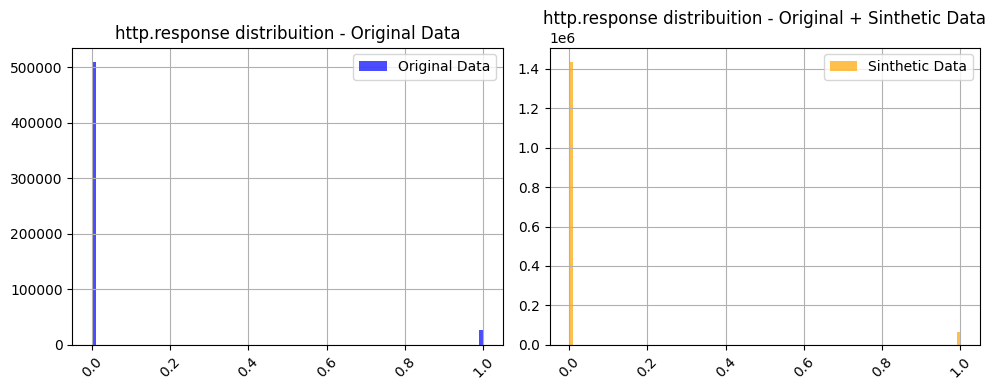

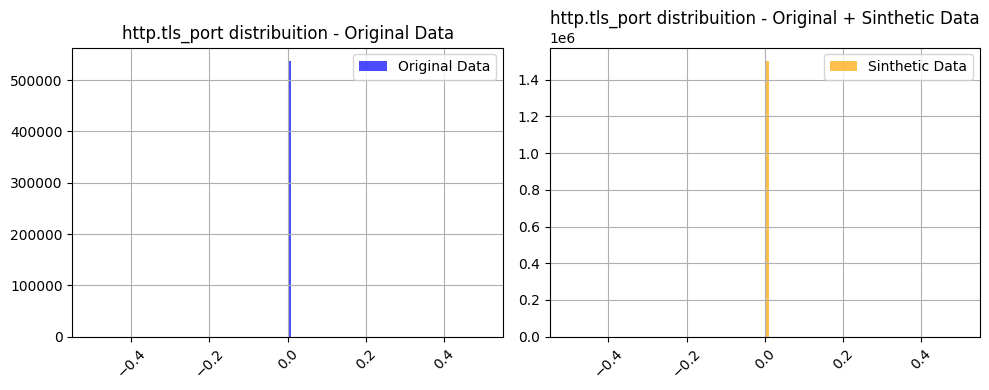

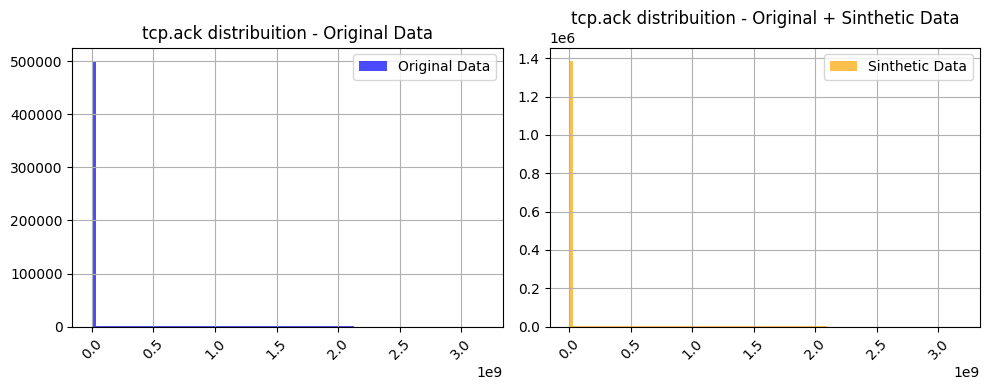

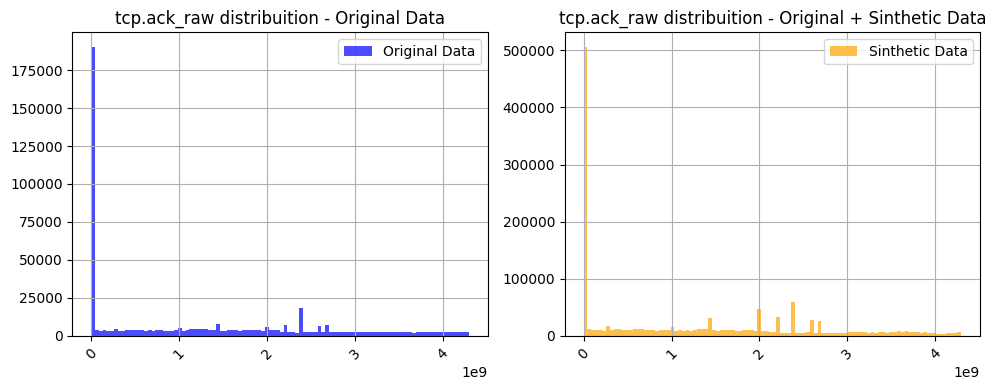

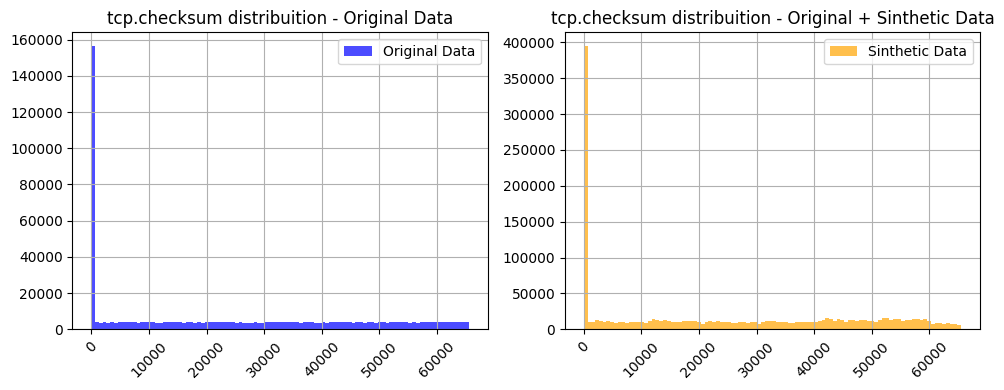

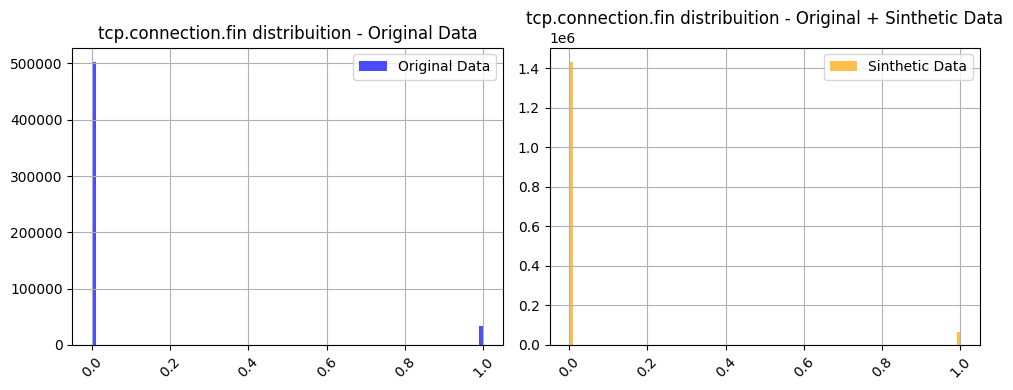

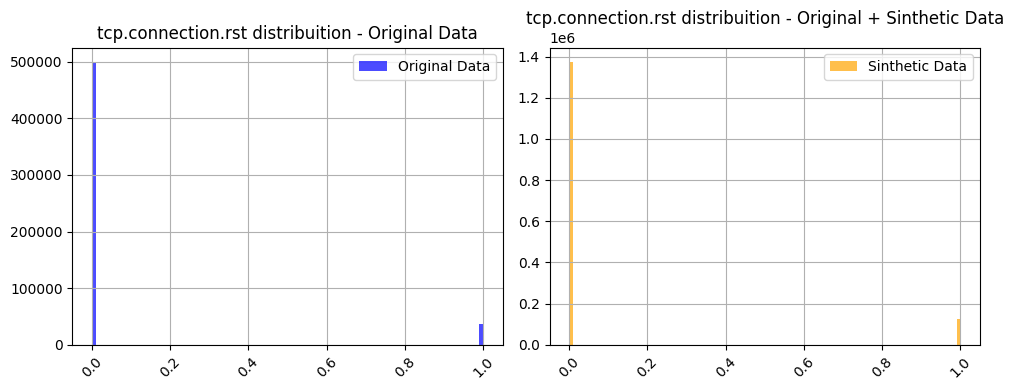

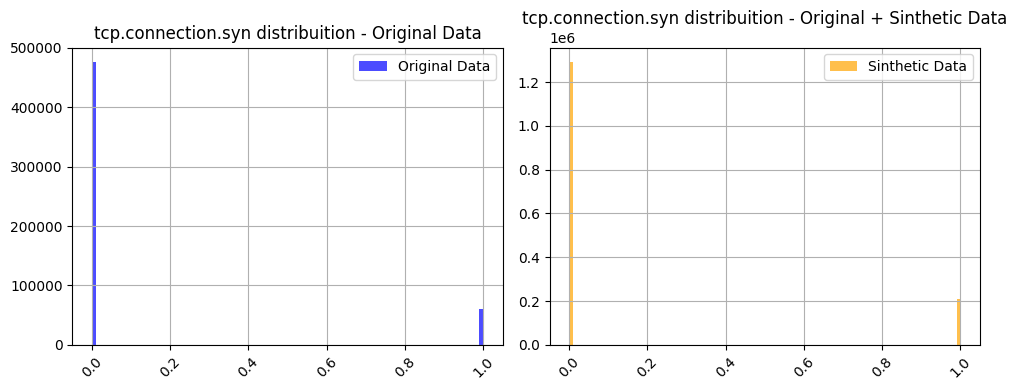

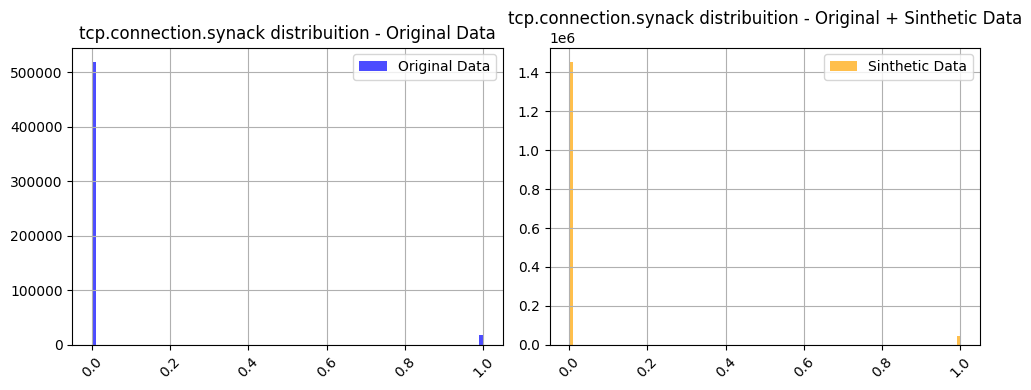

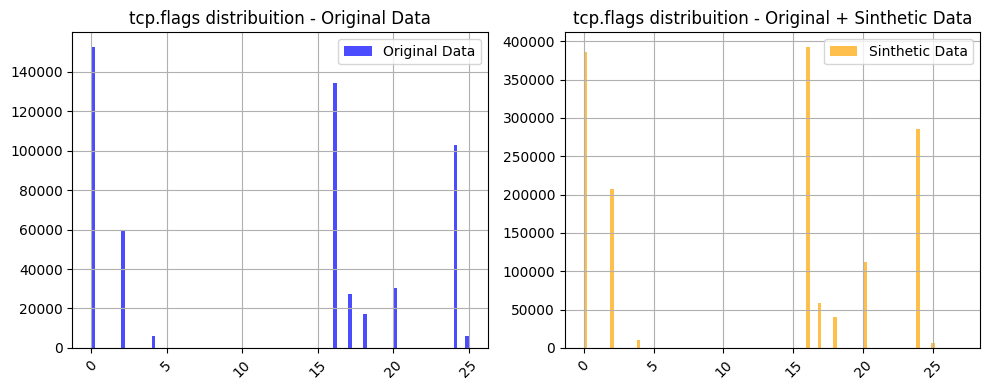

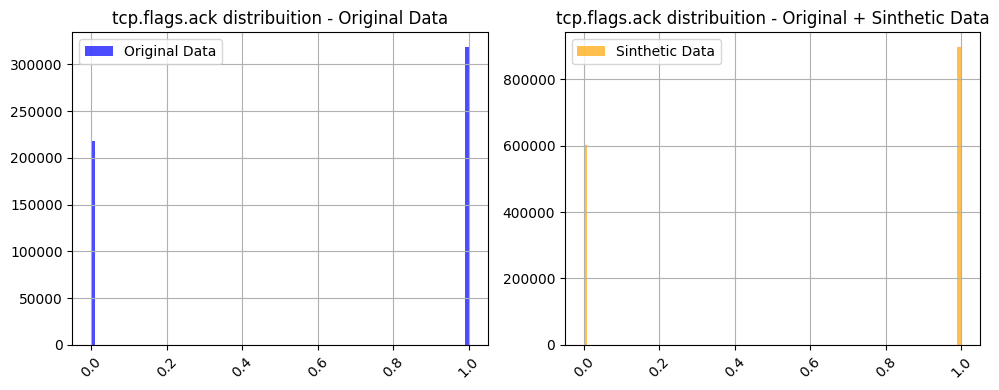

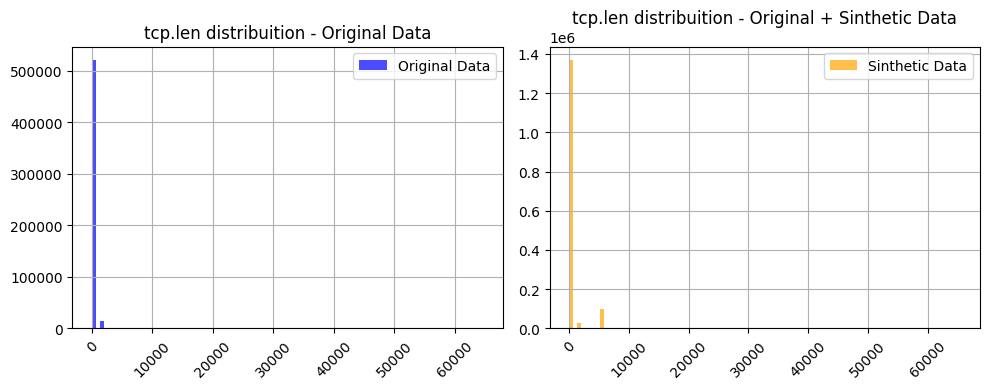

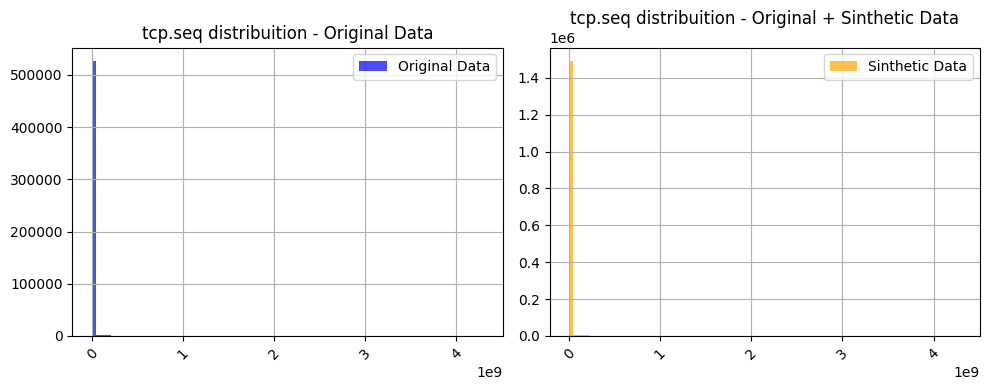

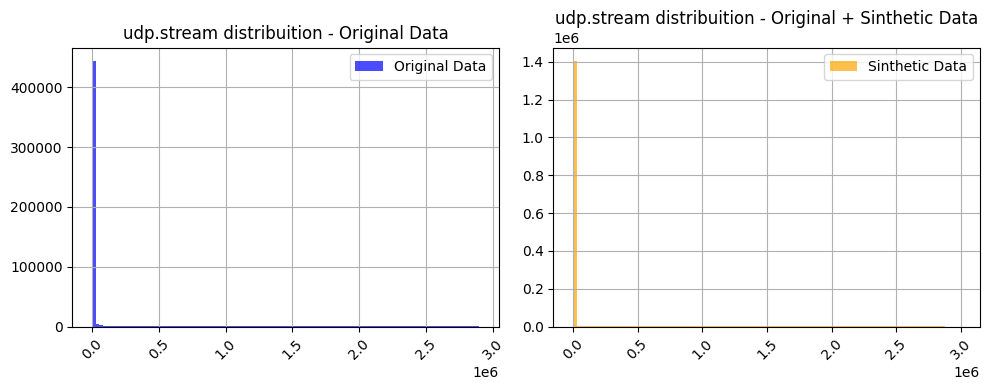

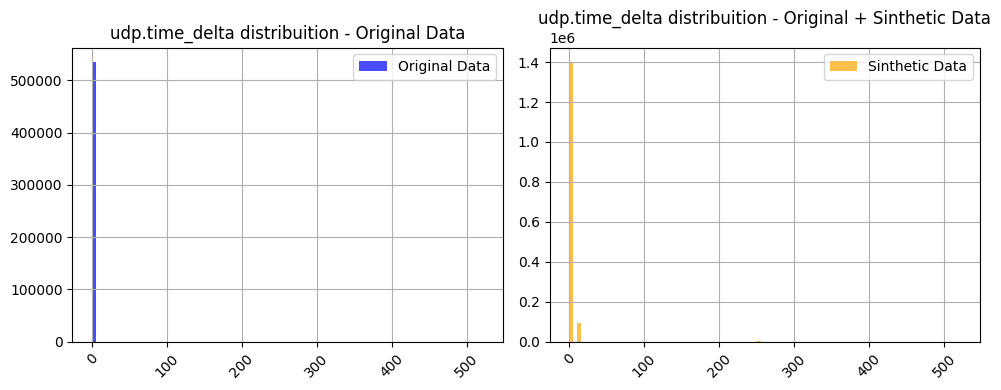

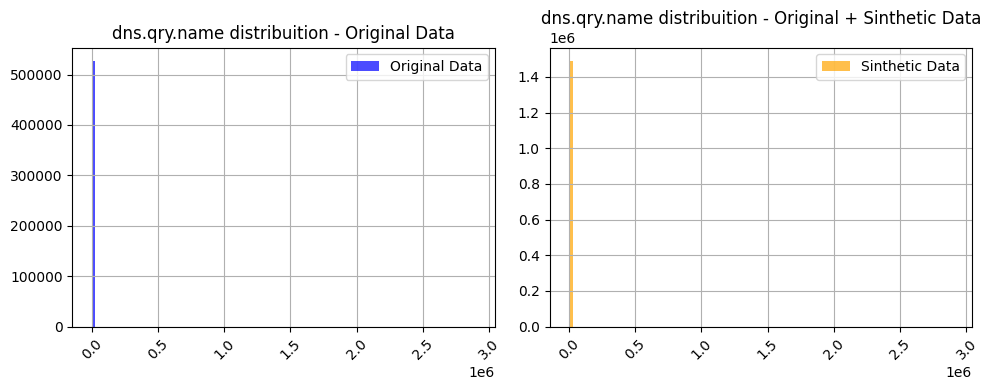

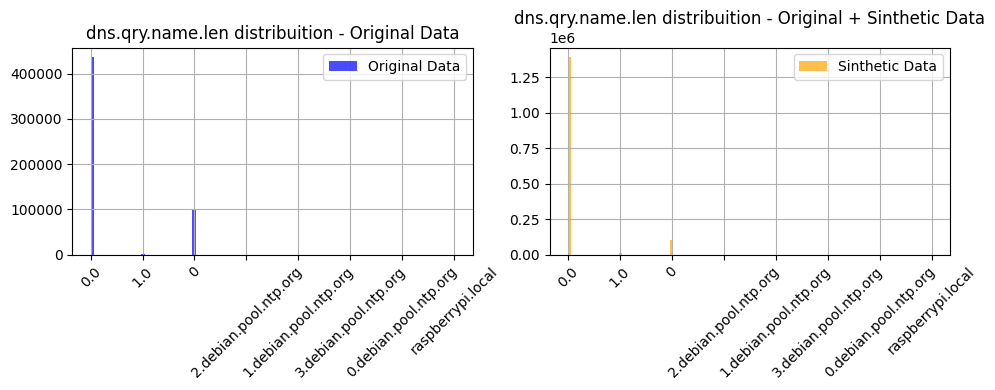

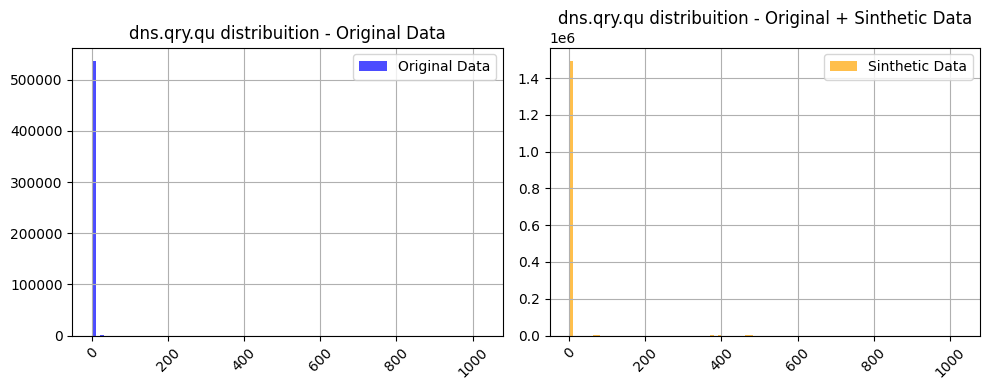

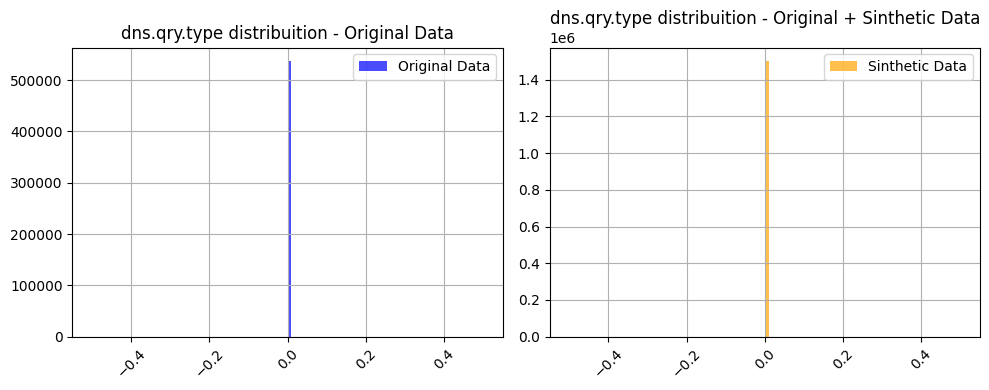

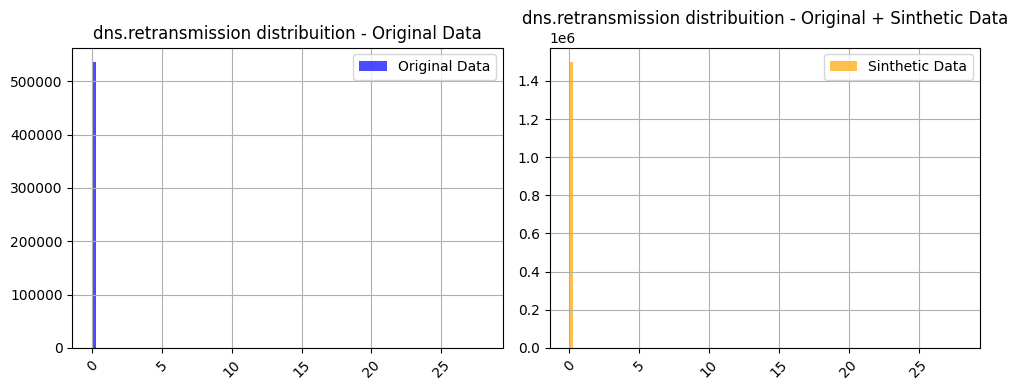

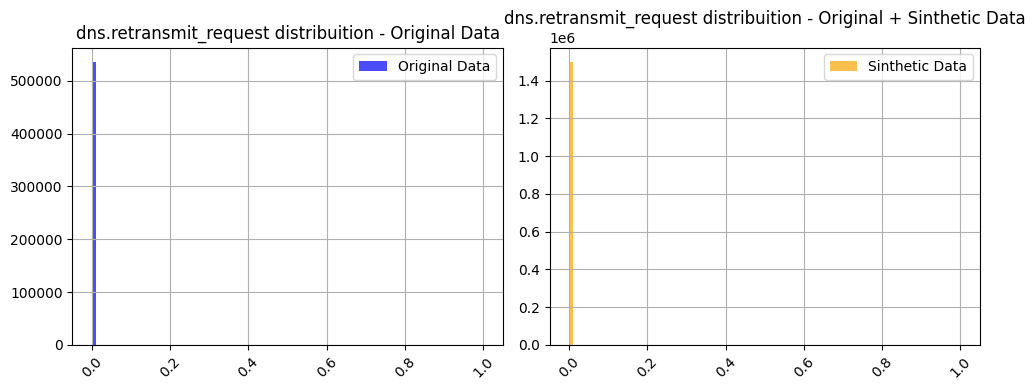

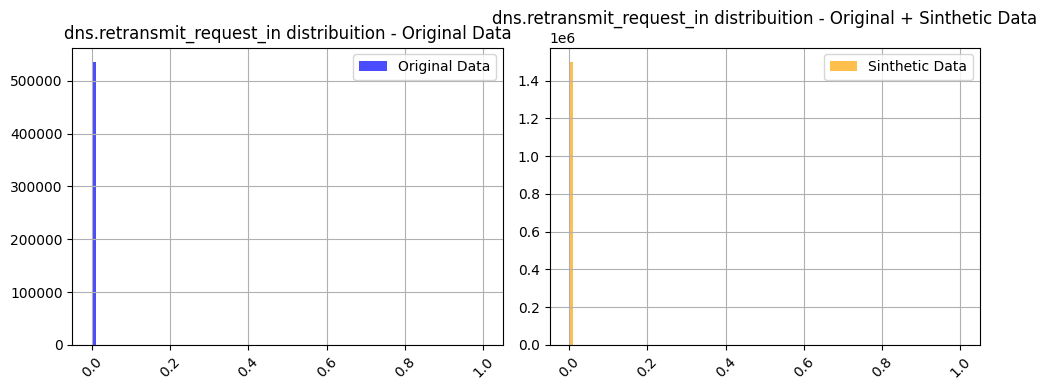

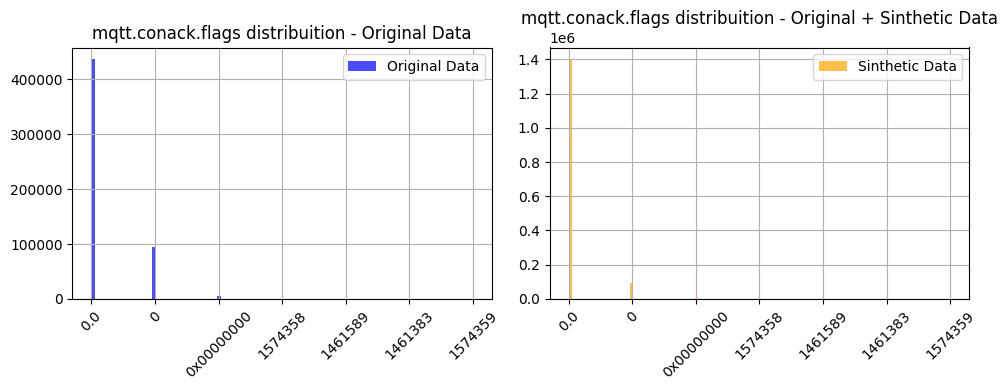

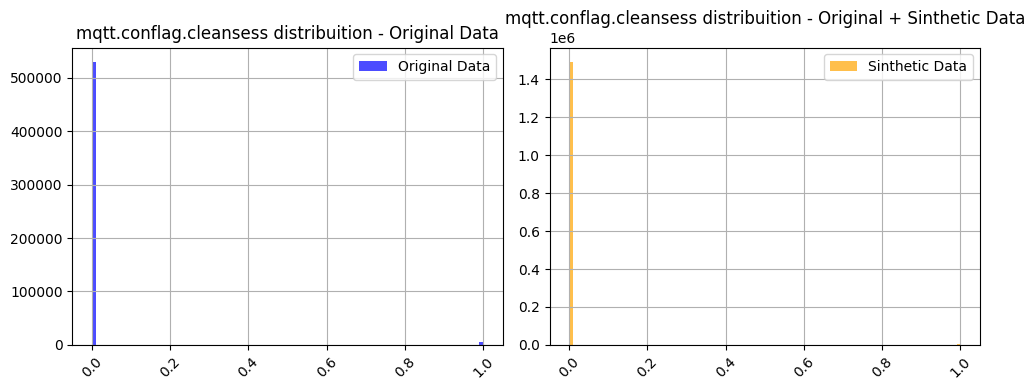

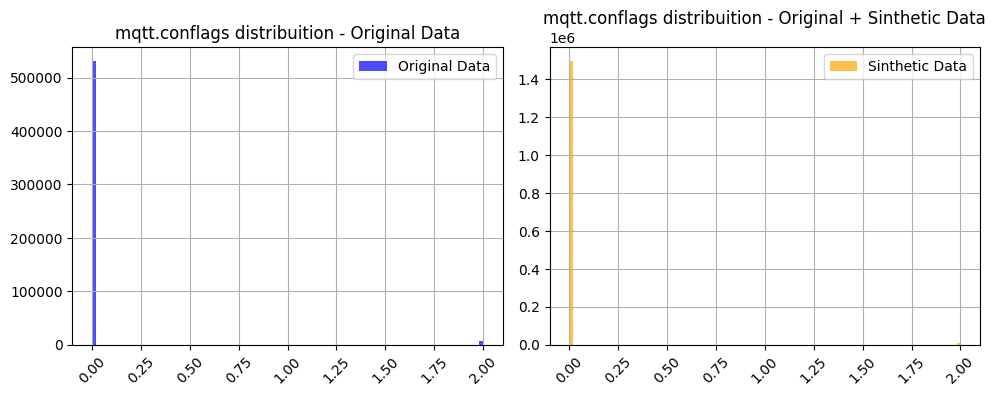

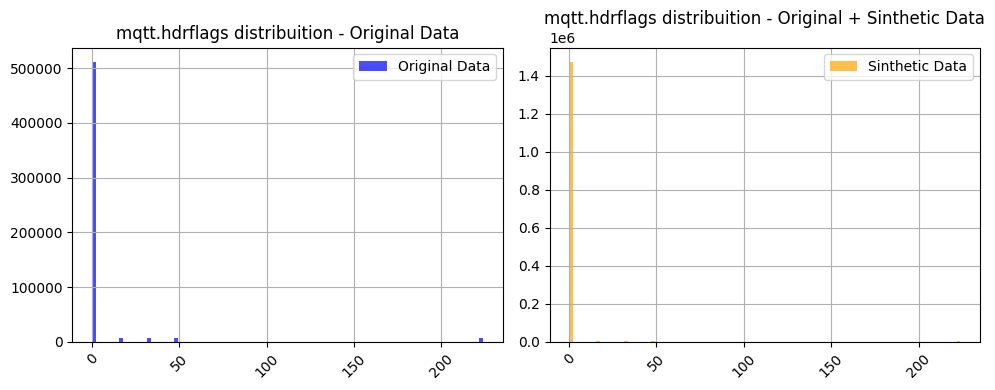

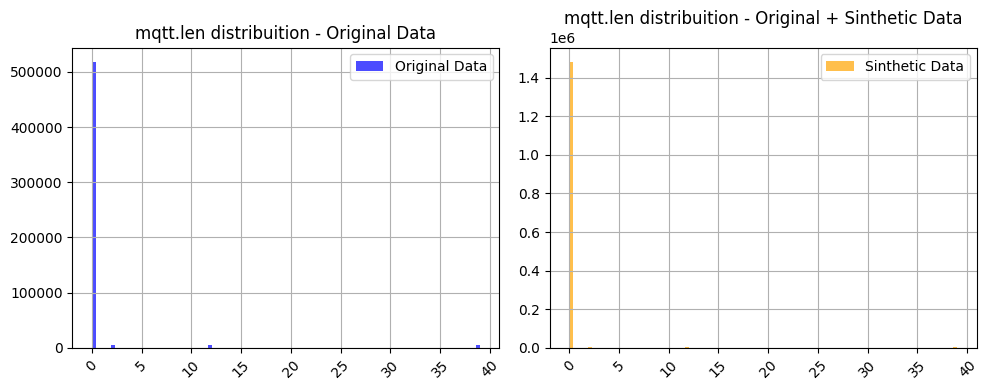

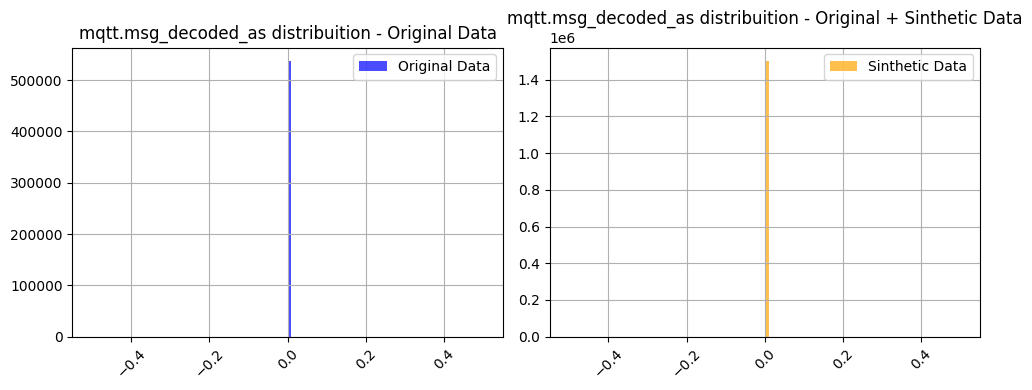

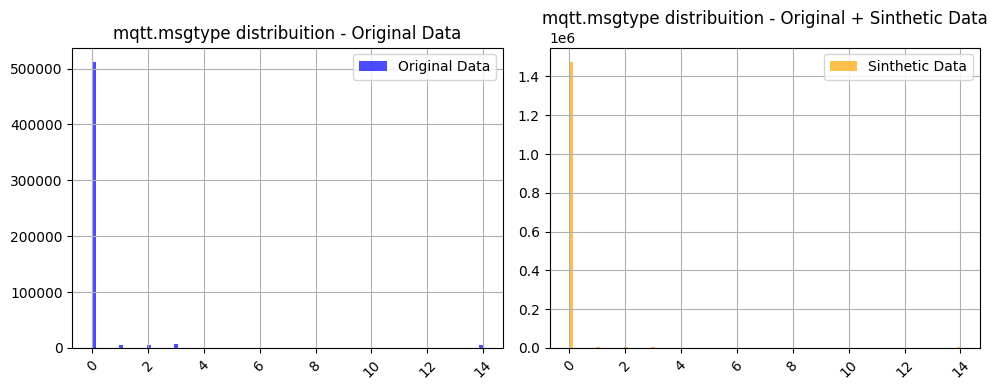

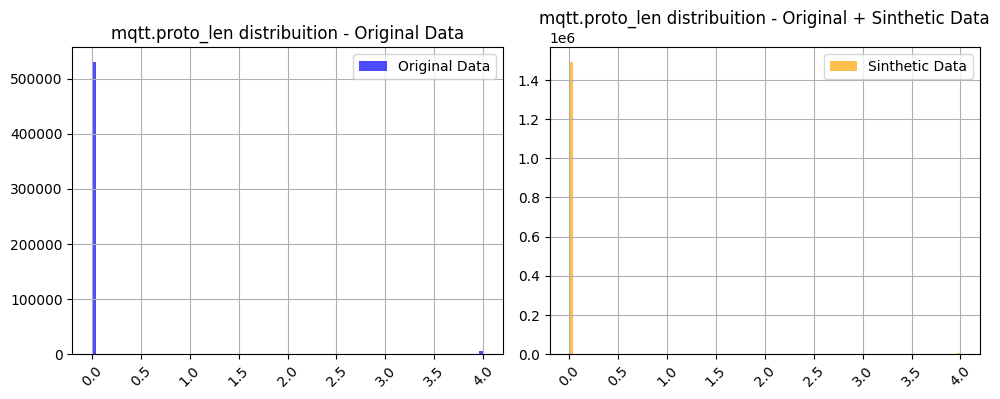

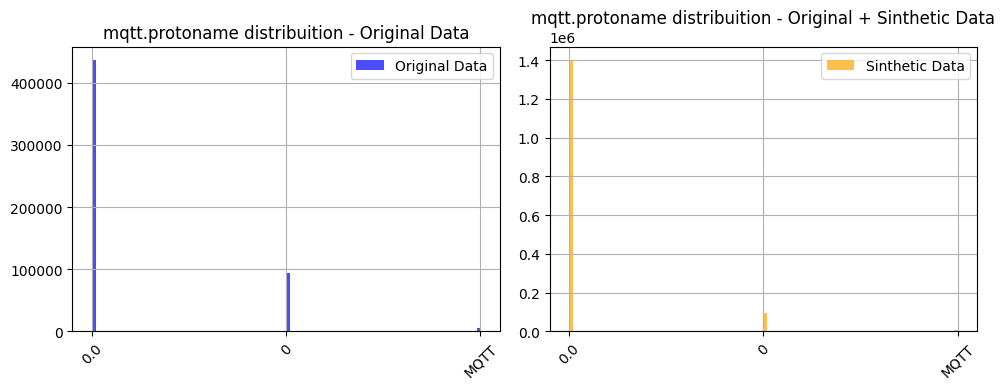

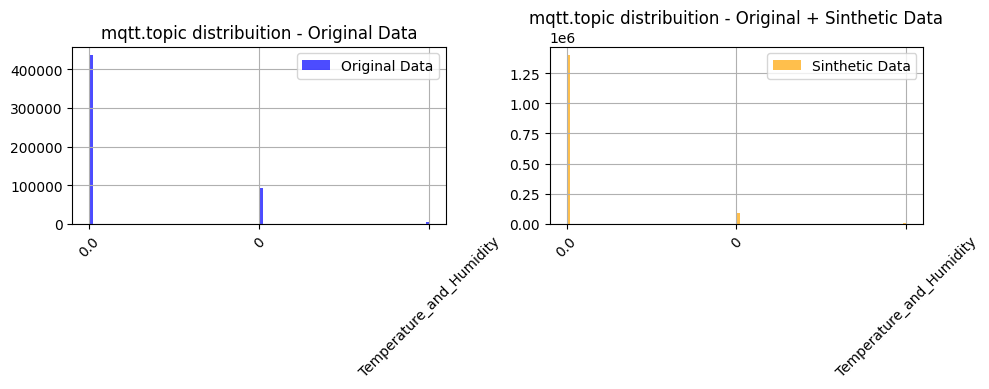

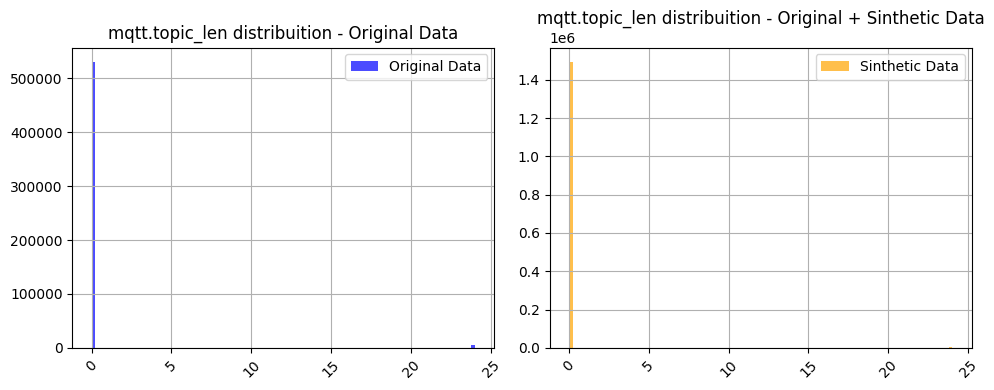

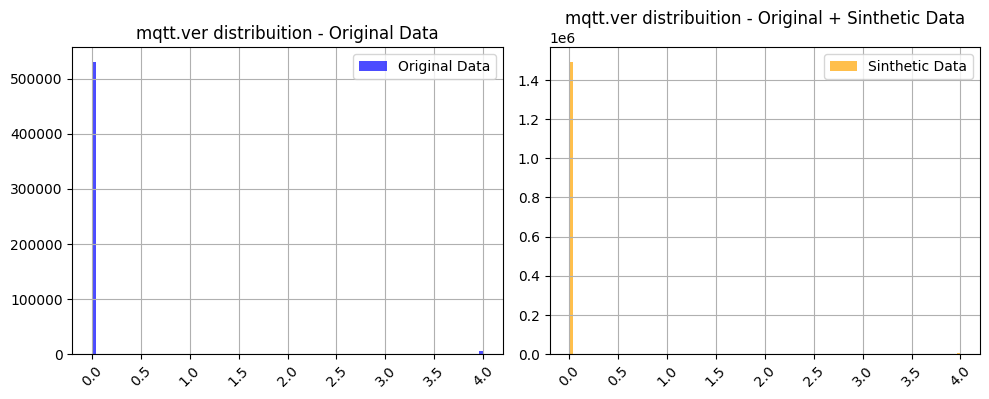

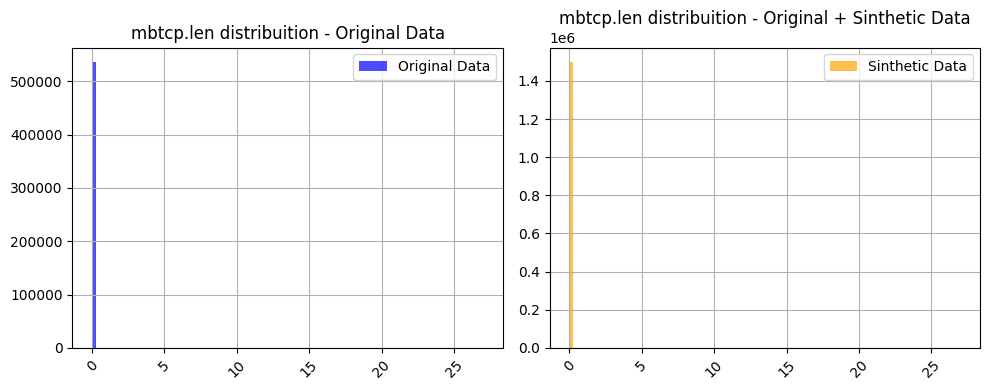

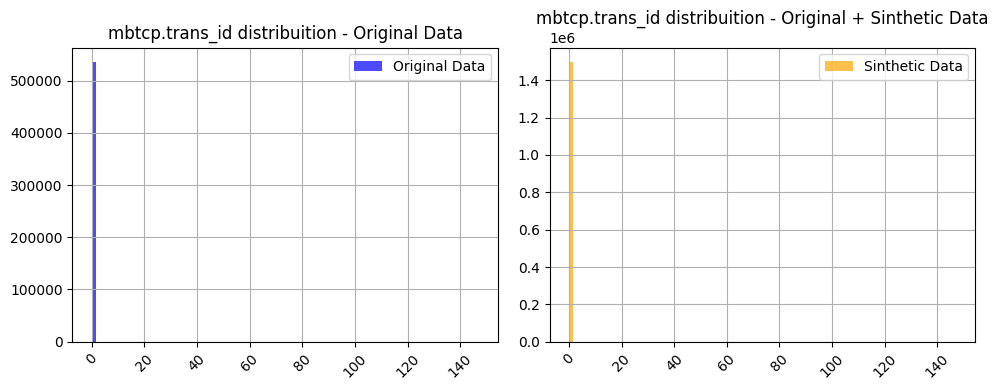

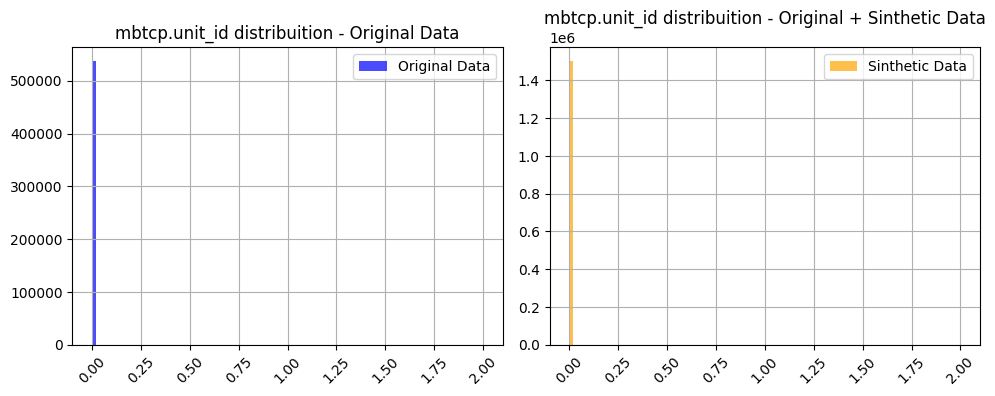

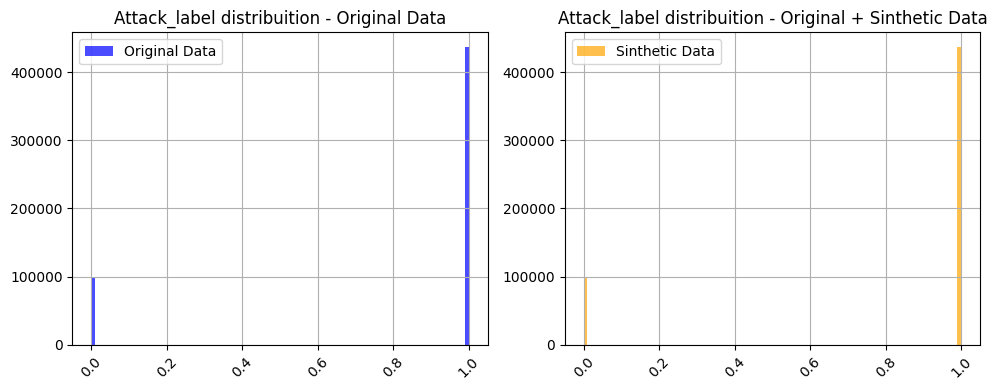

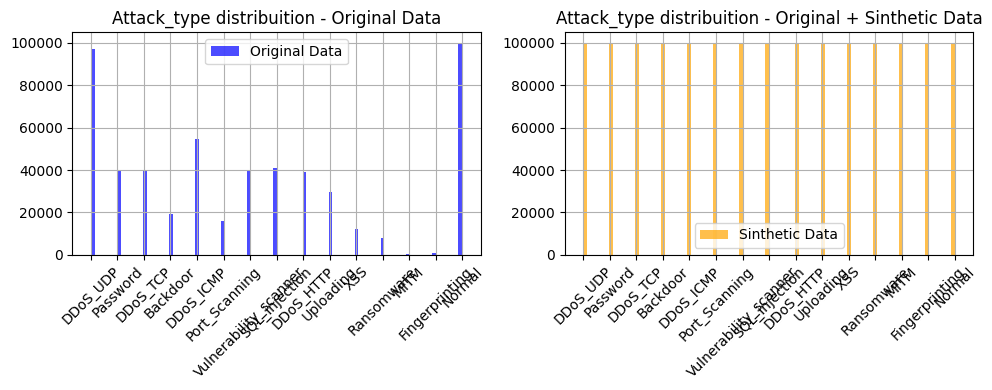

In [5]:
# Data Distribution Comparison
def plot_distribution(data1, data2):
    features = data1.columns.intersection(data2.columns)

    for feature in features:
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        plt.grid(True)
        plt.hist(data1[feature], bins=100, color='blue', alpha=0.7, label='Original Data')
        plt.title(f'{feature} distribuition - Original Data')
        plt.xticks(rotation=45)
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.grid(True)
        plt.hist(data2[feature], bins=100, color='orange', alpha=0.7, label='Sinthetic Data')
        plt.title(f'{feature} distribuition - Original + Sinthetic Data')
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

plot_distribution(df_original, df_smote)

In [6]:

# from scipy.stats import ks_2samp

# # Teste de Kolmogorov-Smirnov
# def ks_test(data1, data2):
#     features = data1.columns

#     for feature in features:
#         stat, p_value = ks_2samp(data1[feature], data2[feature])
#         print(f"Resultado do teste de Kolmogorov-Smirnov para {feature}:\nEstatística: {stat}\nValor-p: {p_value}")

# ks_testv(df_original, df_smote)


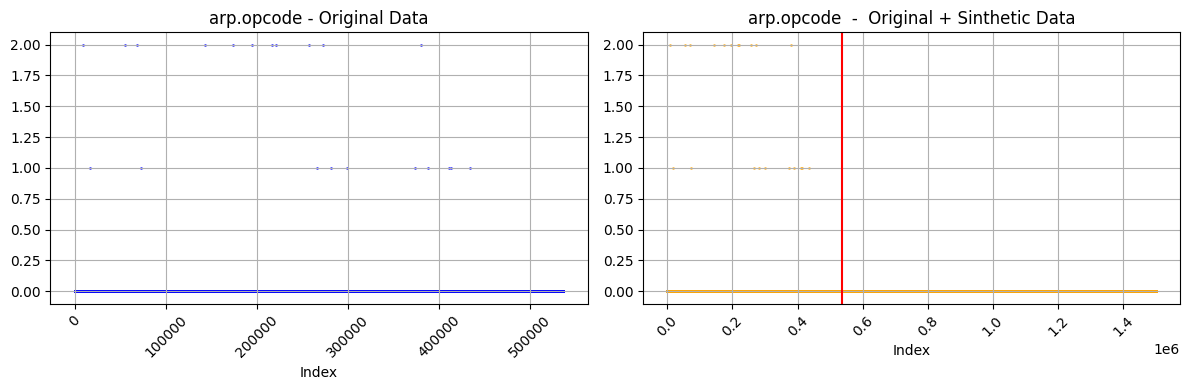

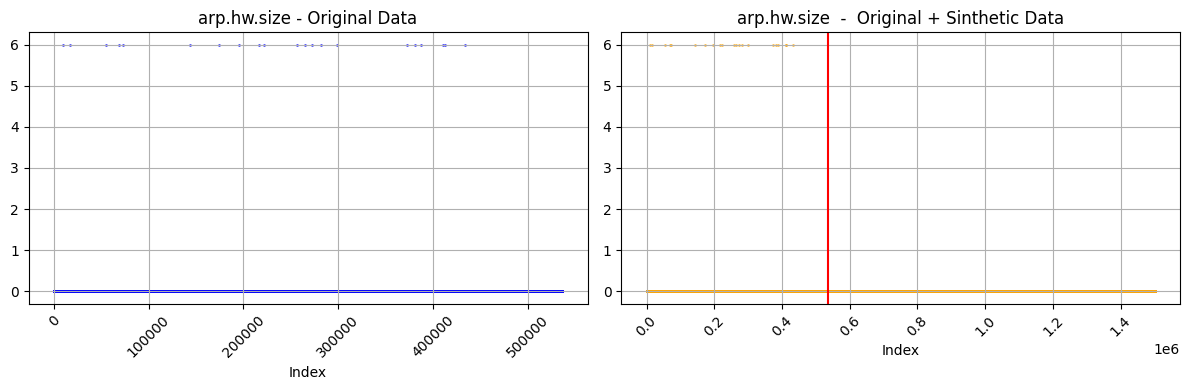

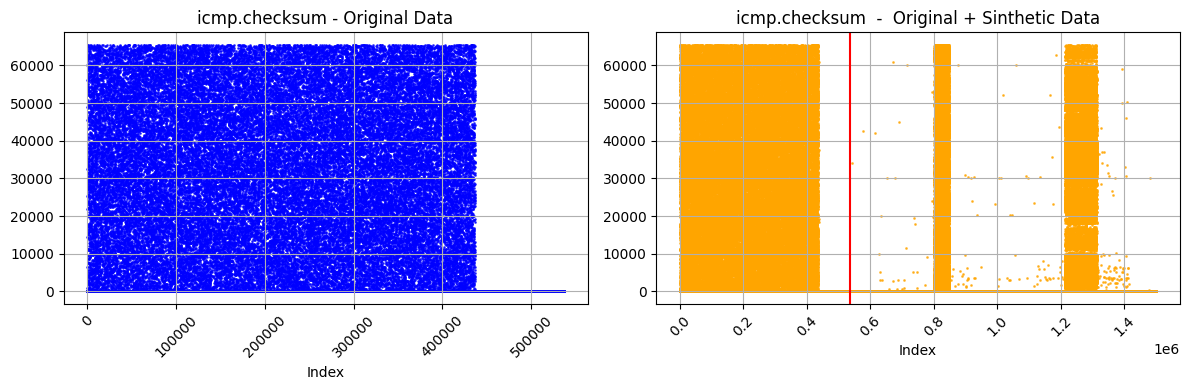

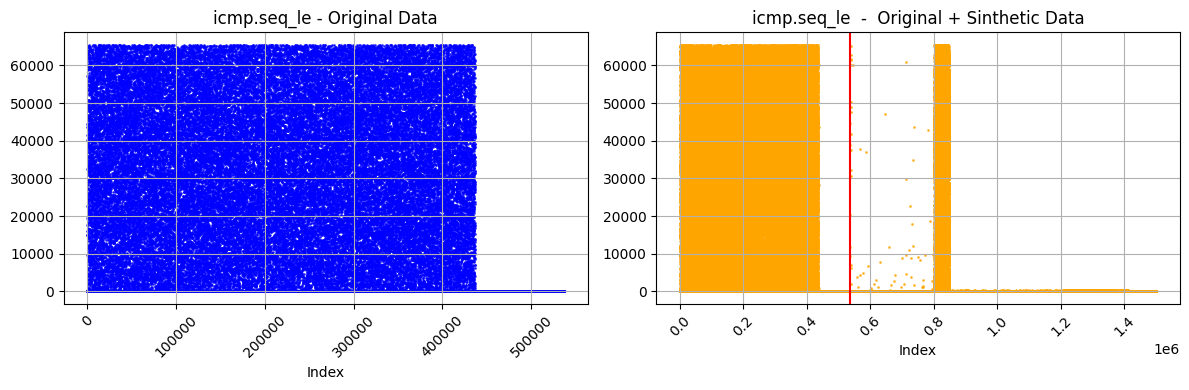

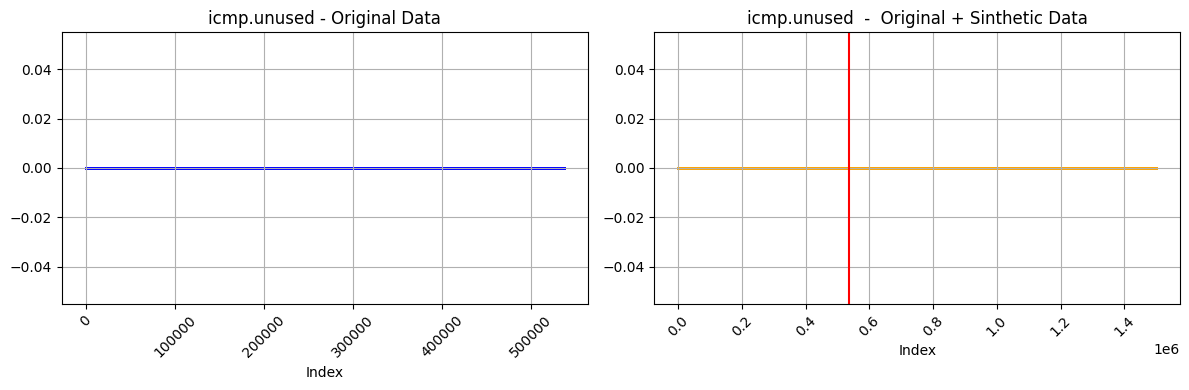

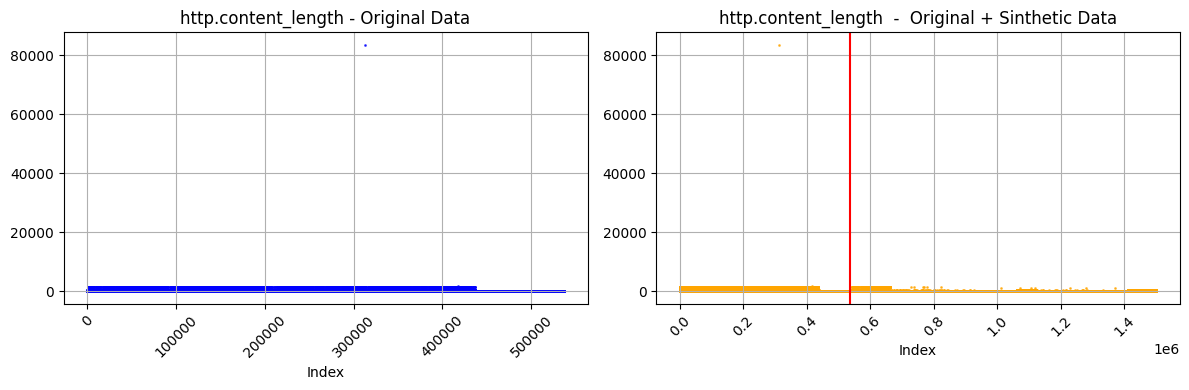

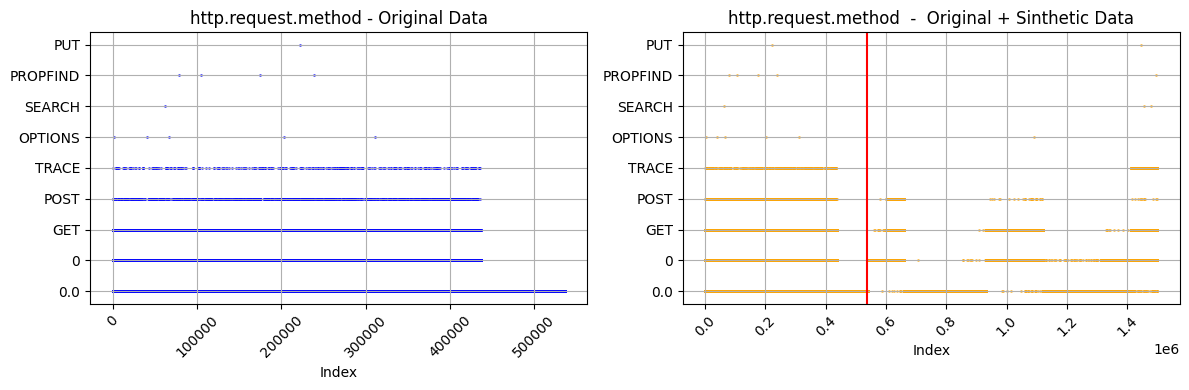

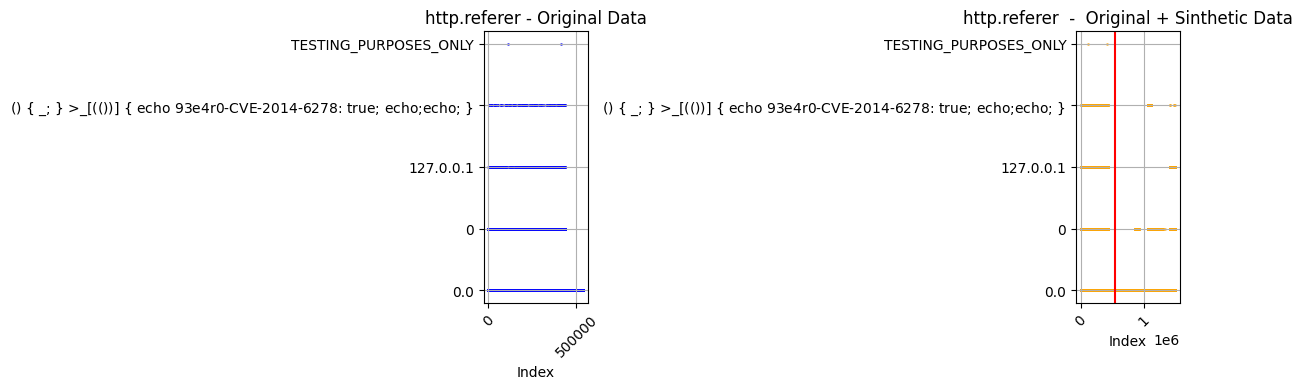

/tmp/ipykernel_122778/1442267721.py:26: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


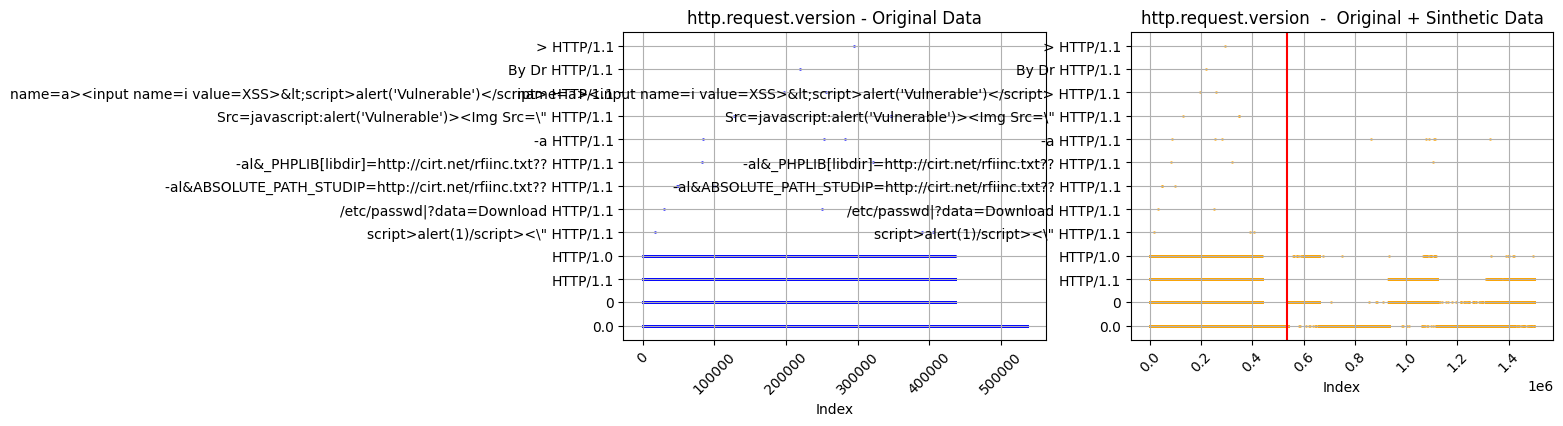

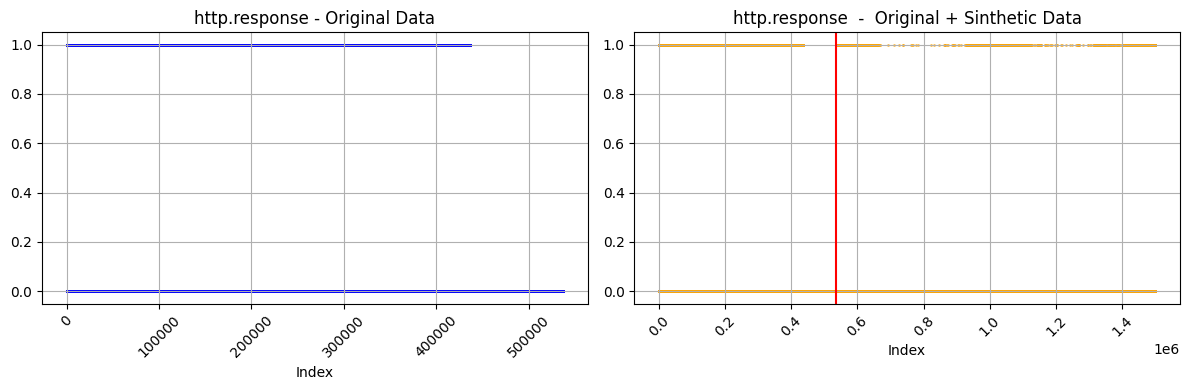

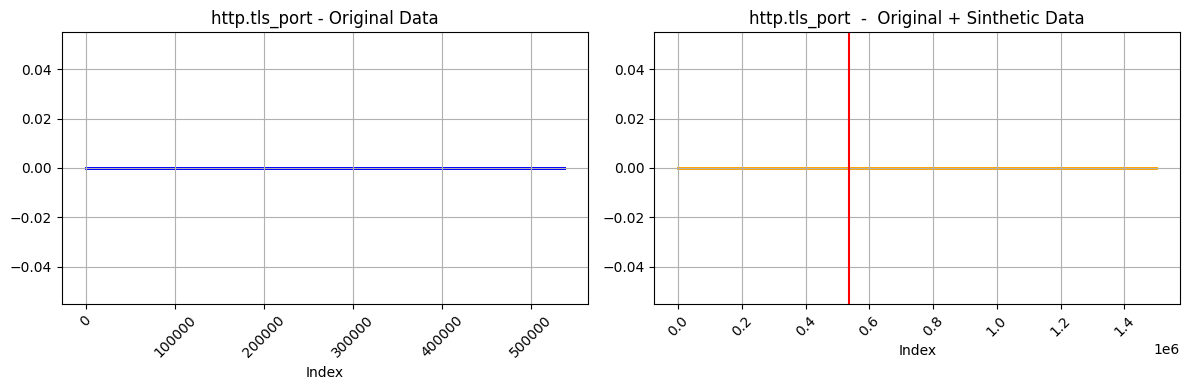

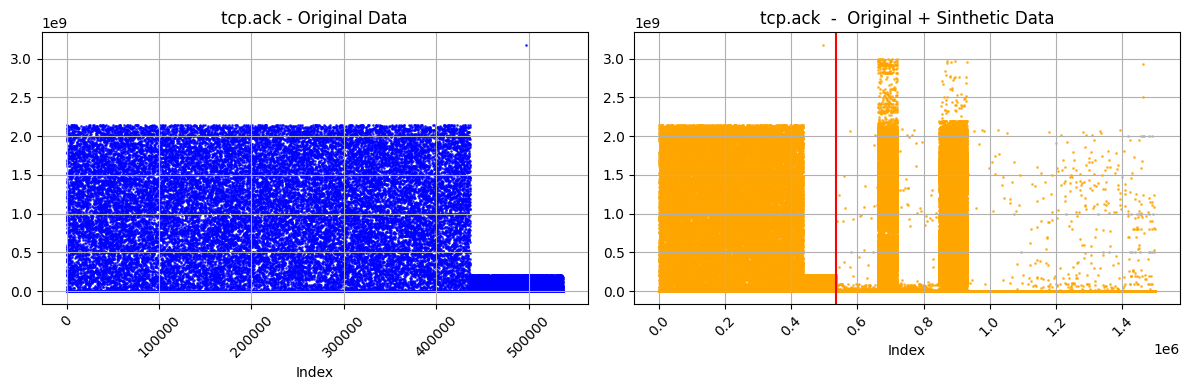

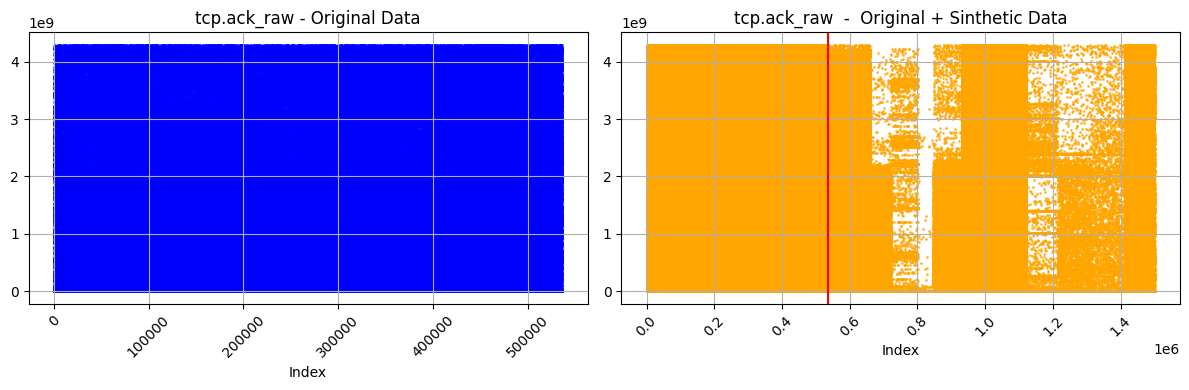

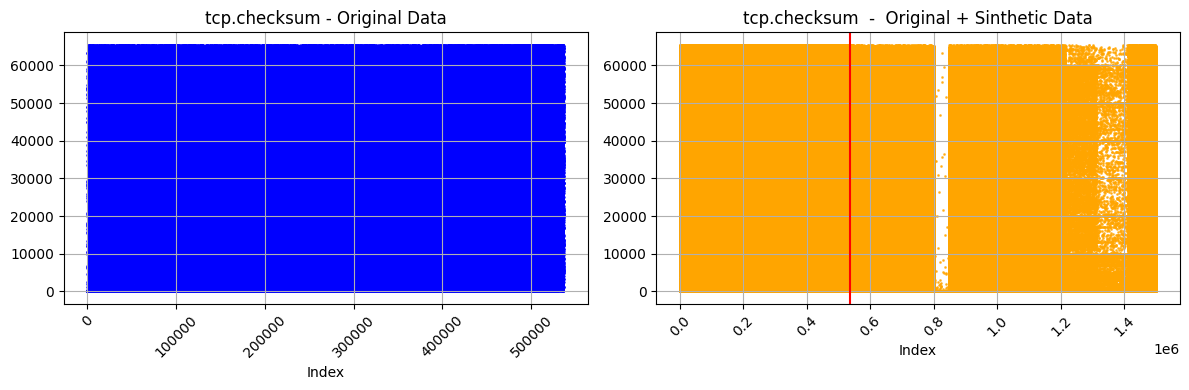

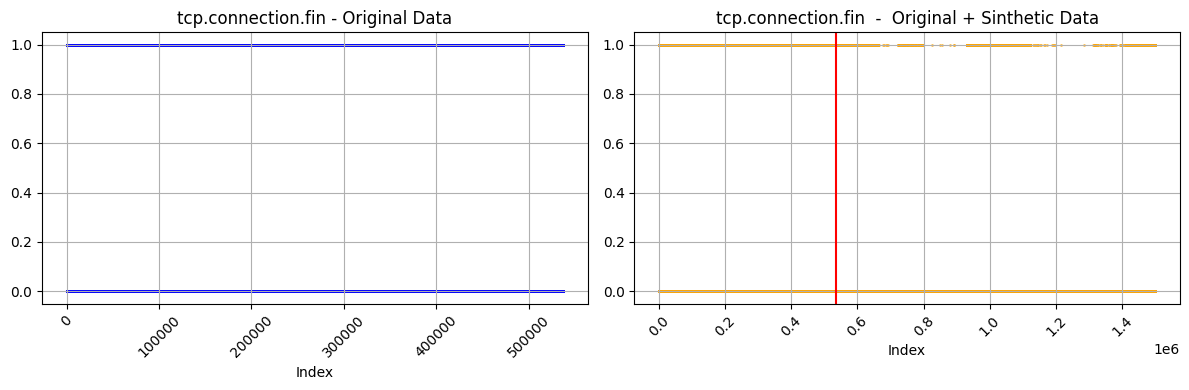

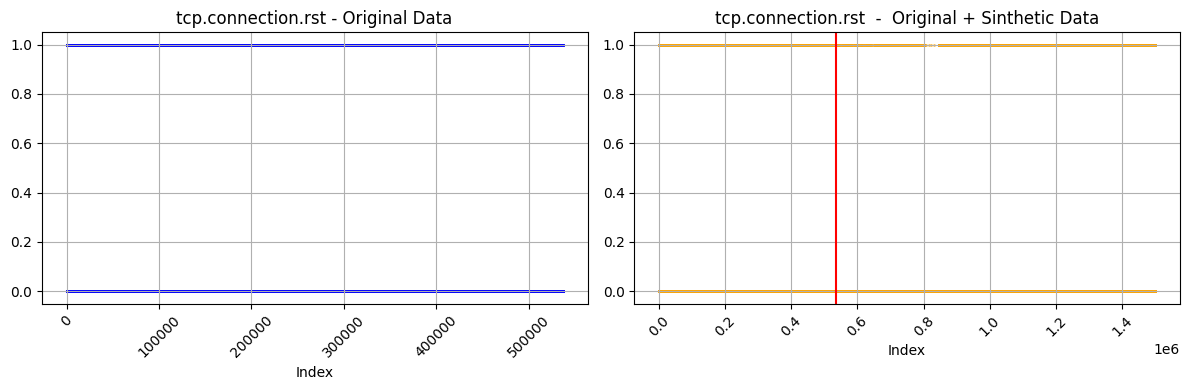

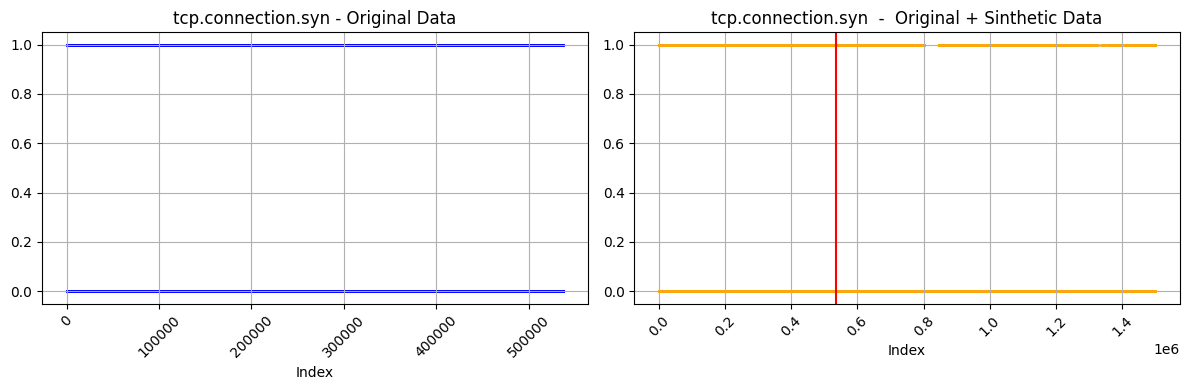

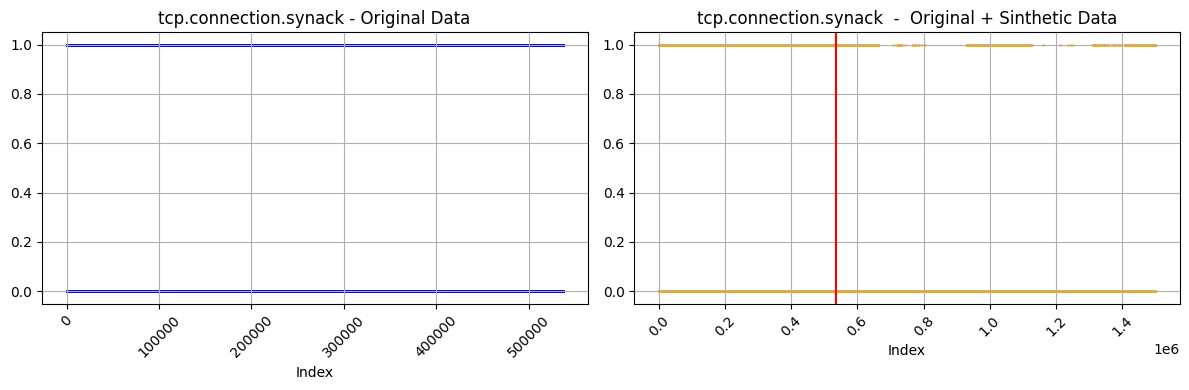

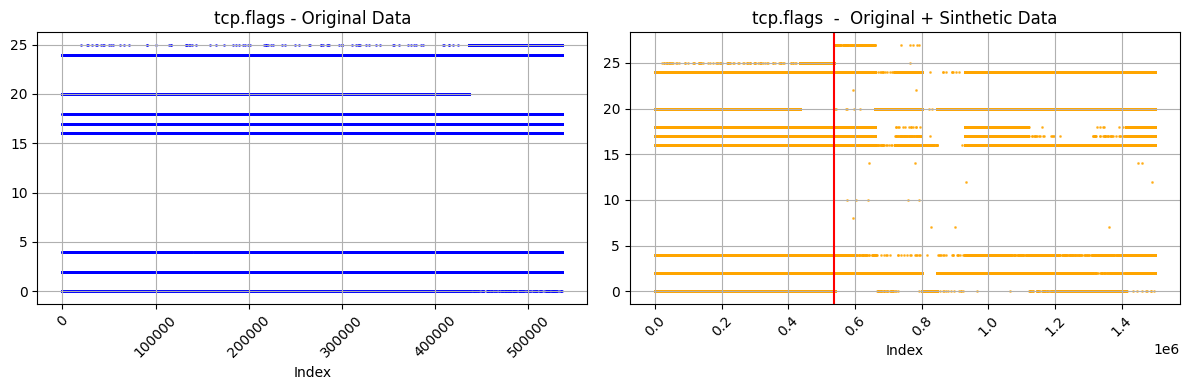

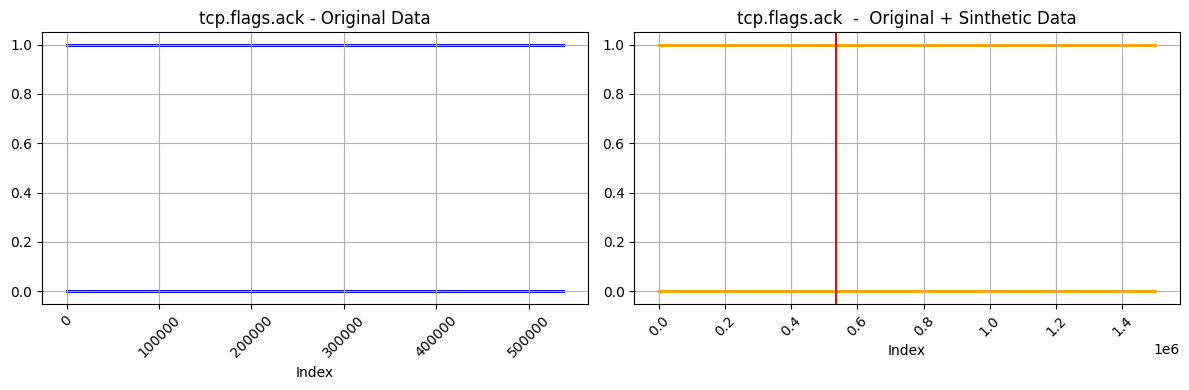

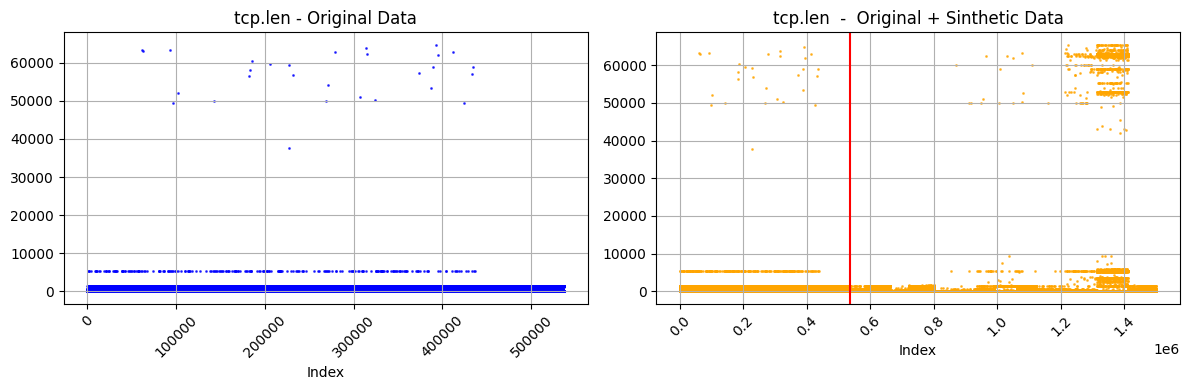

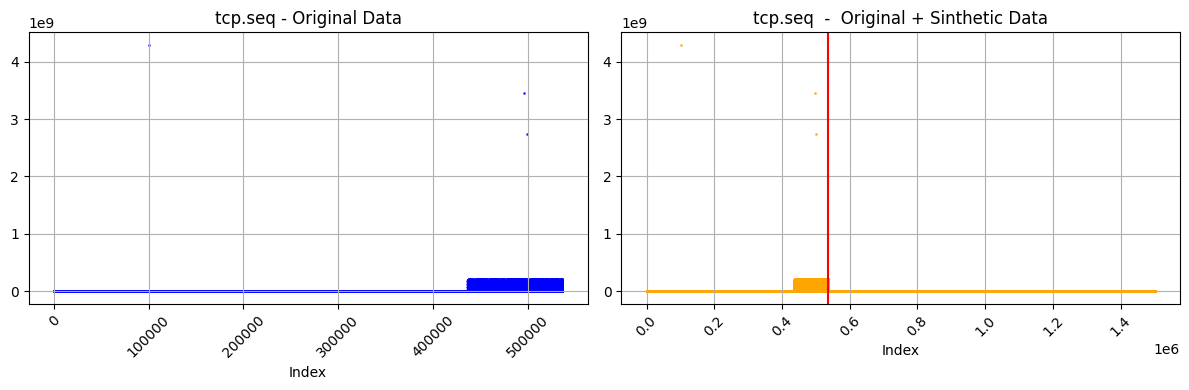

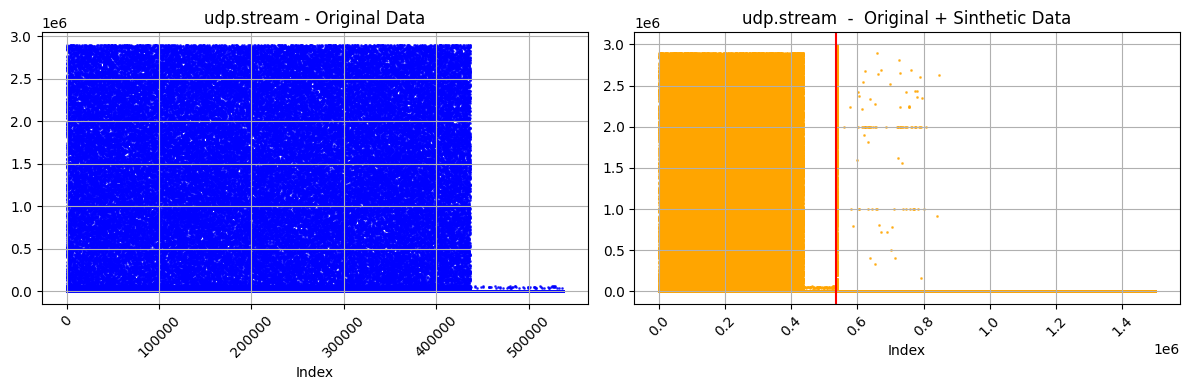

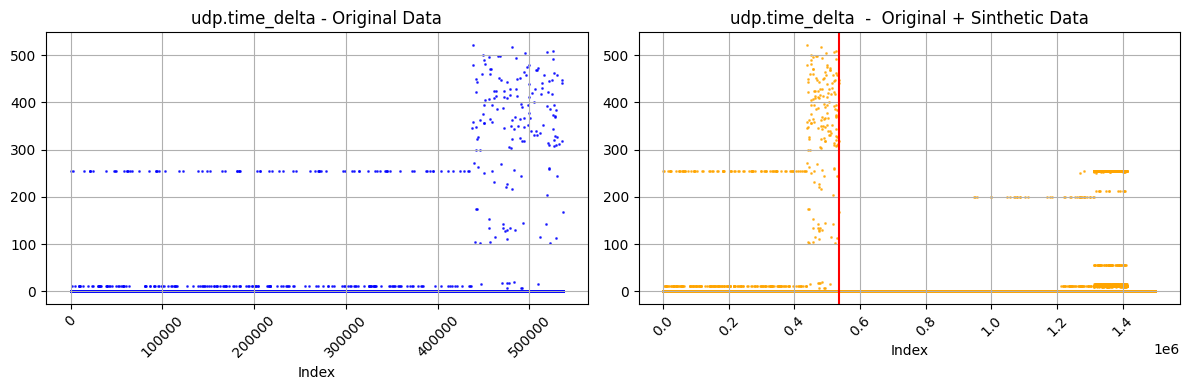

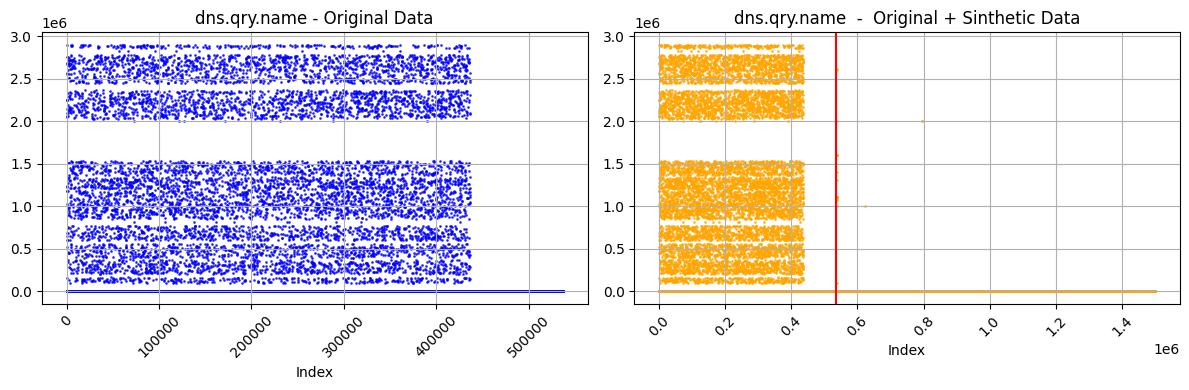

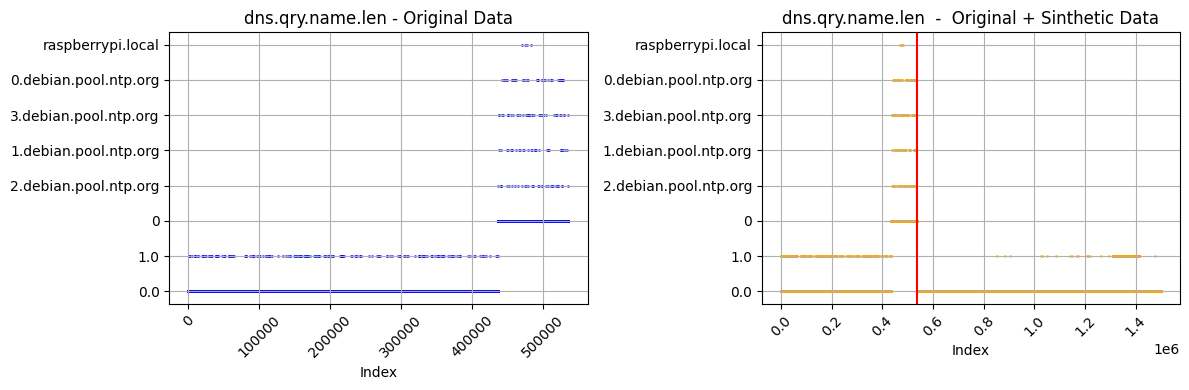

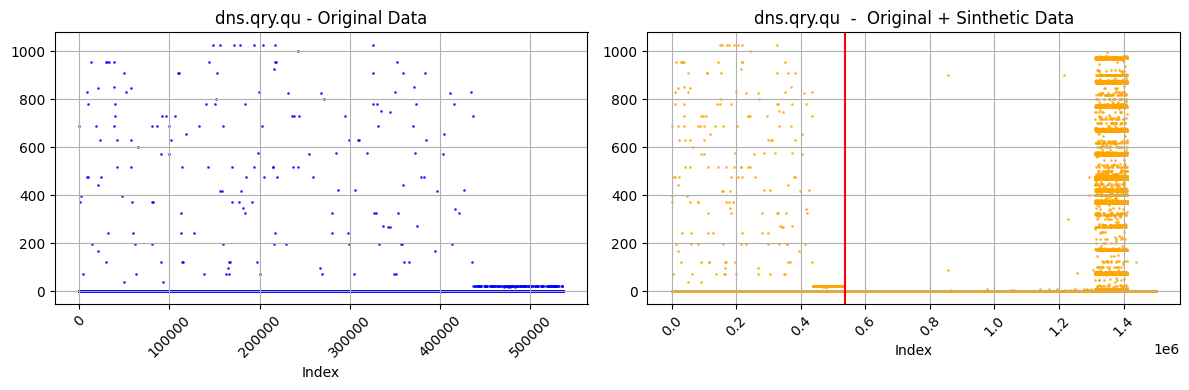

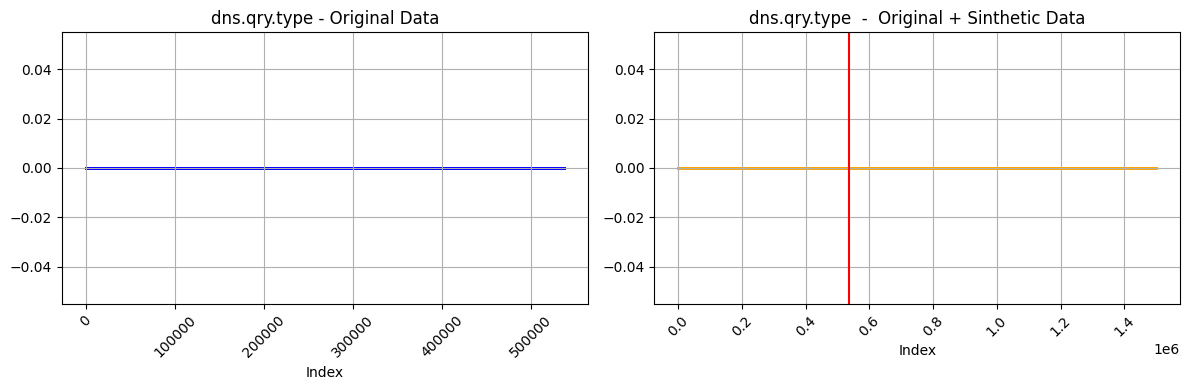

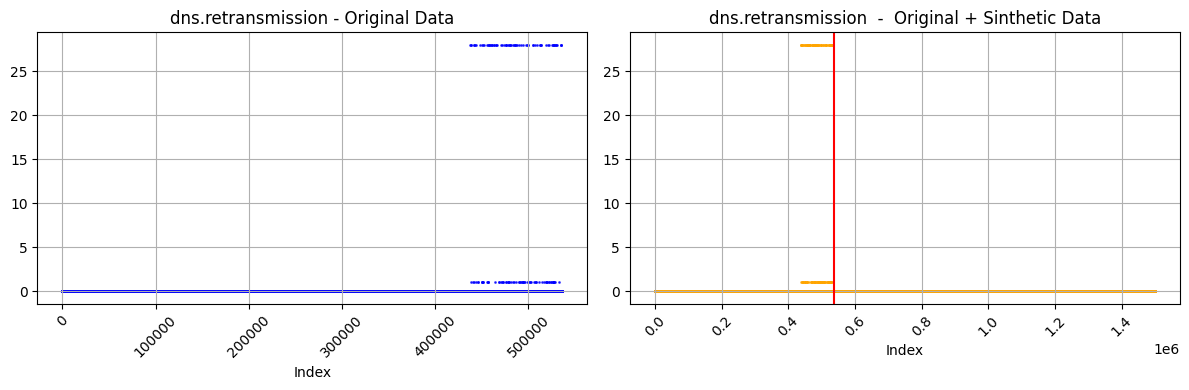

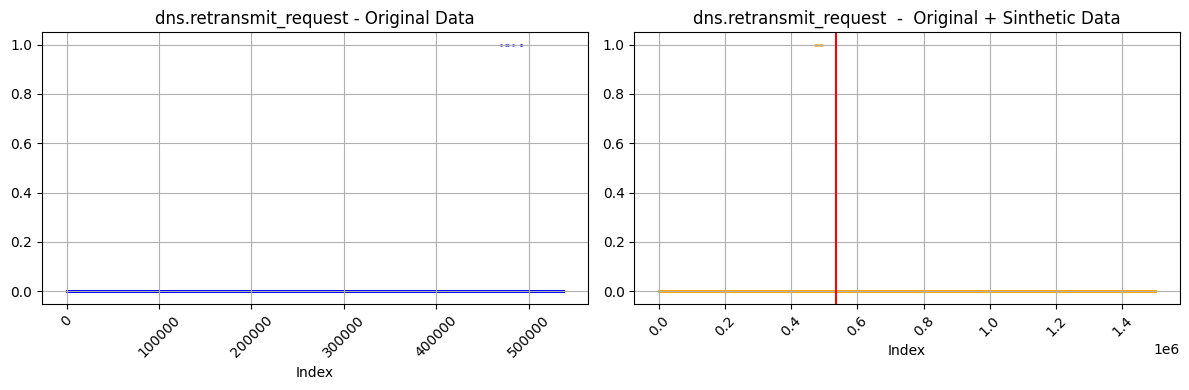

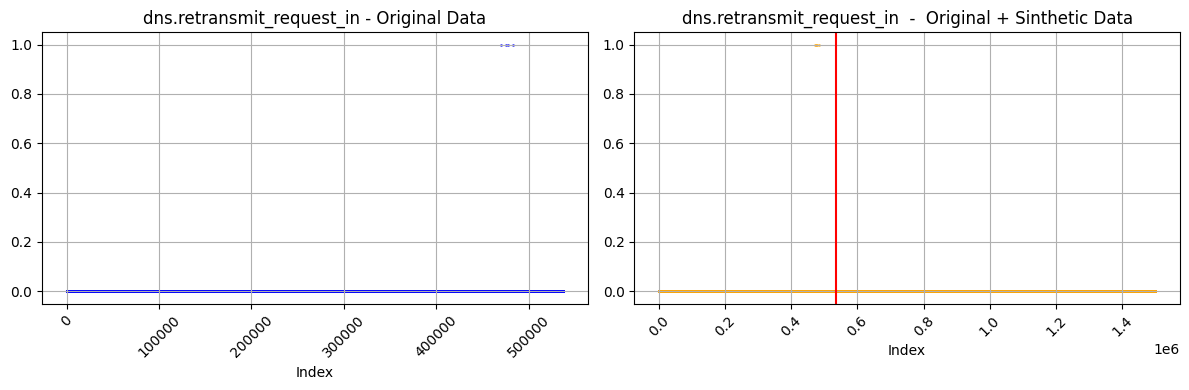

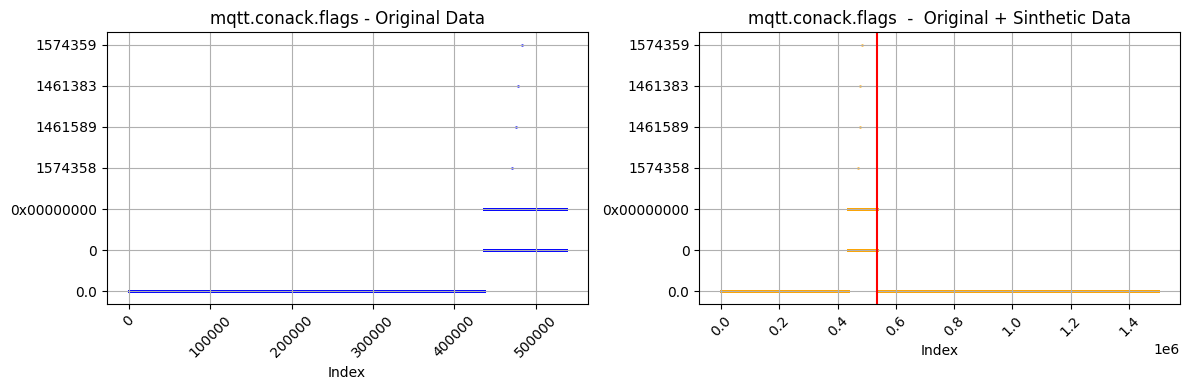

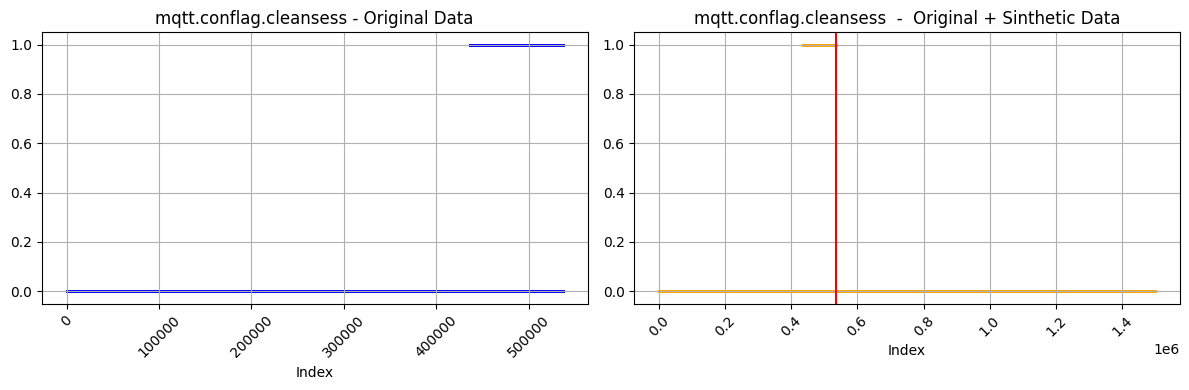

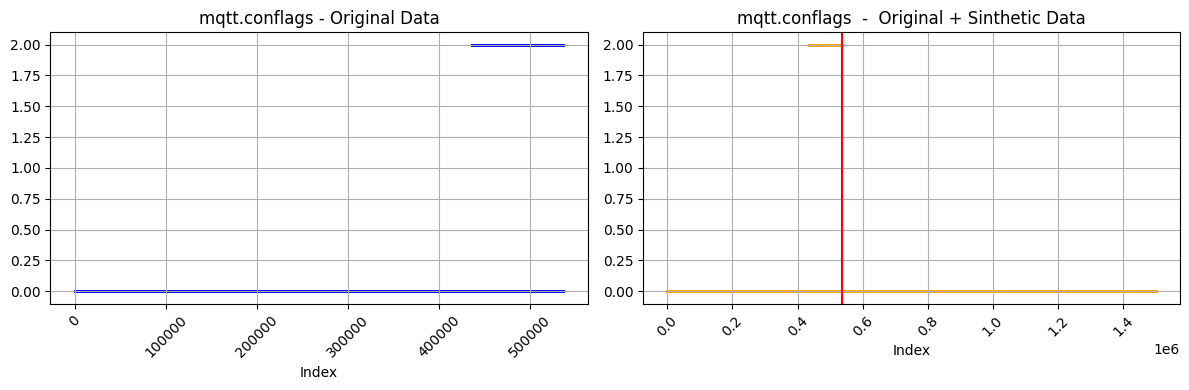

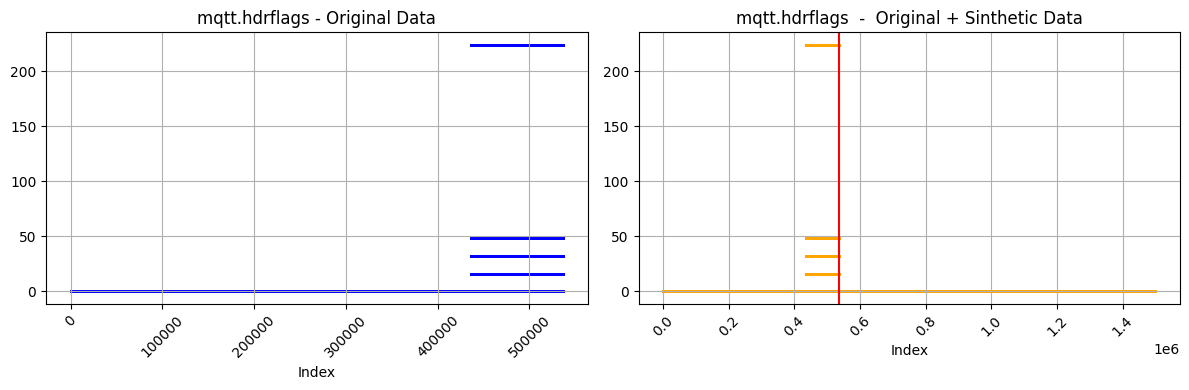

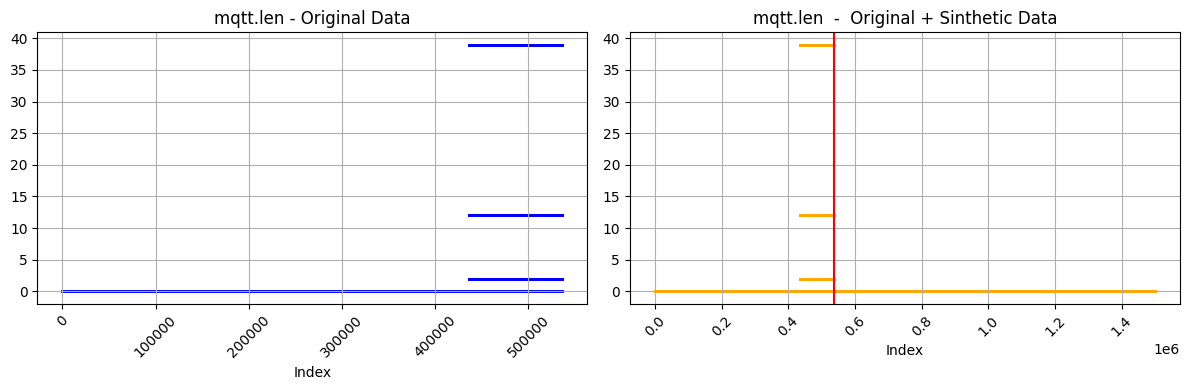

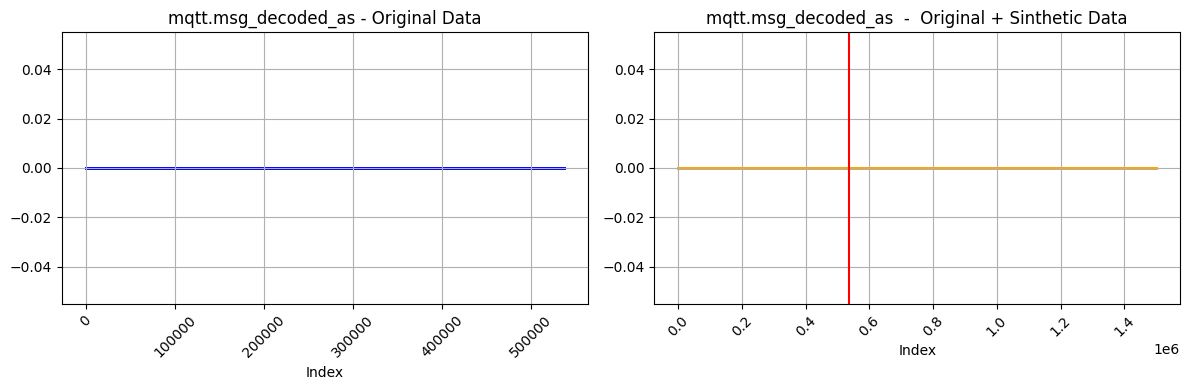

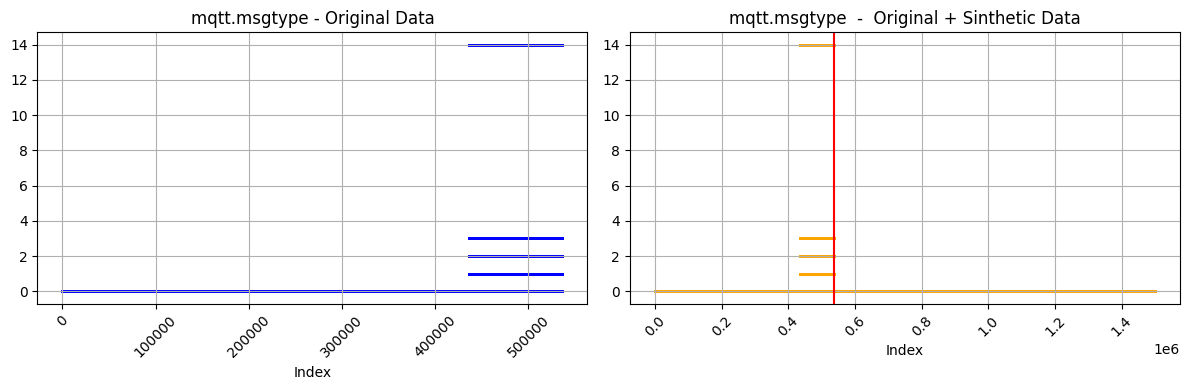

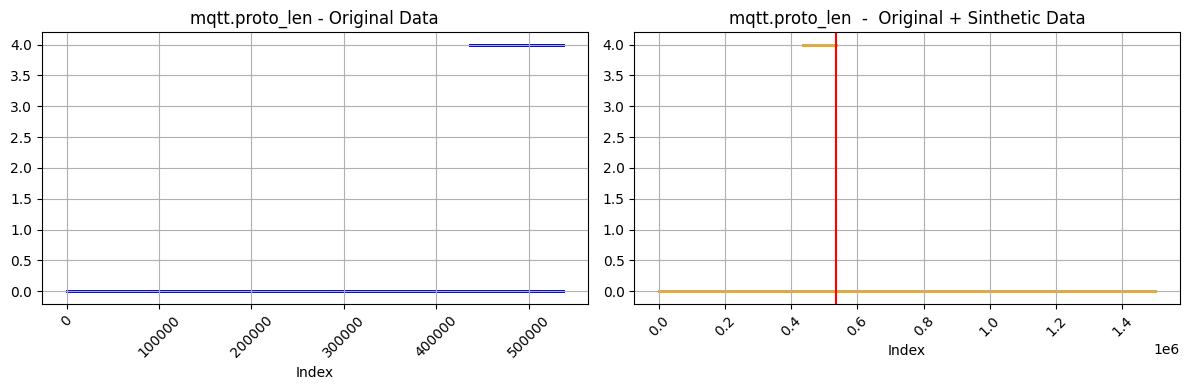

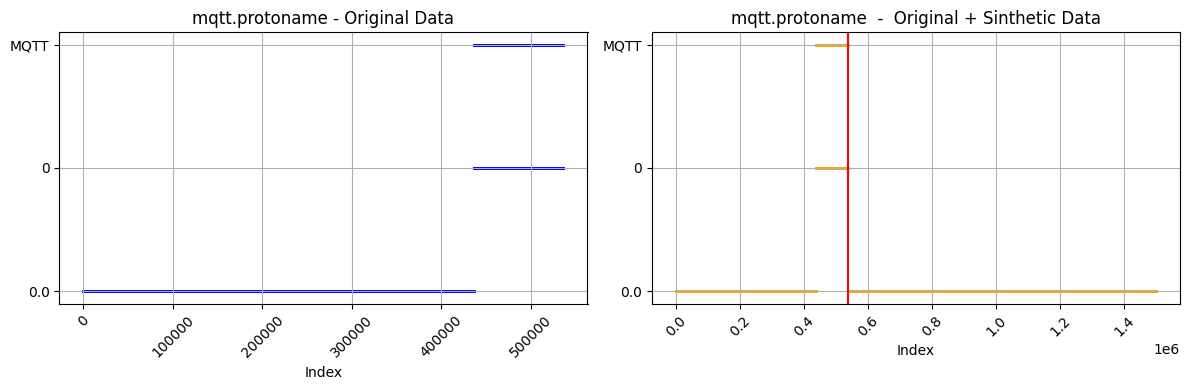

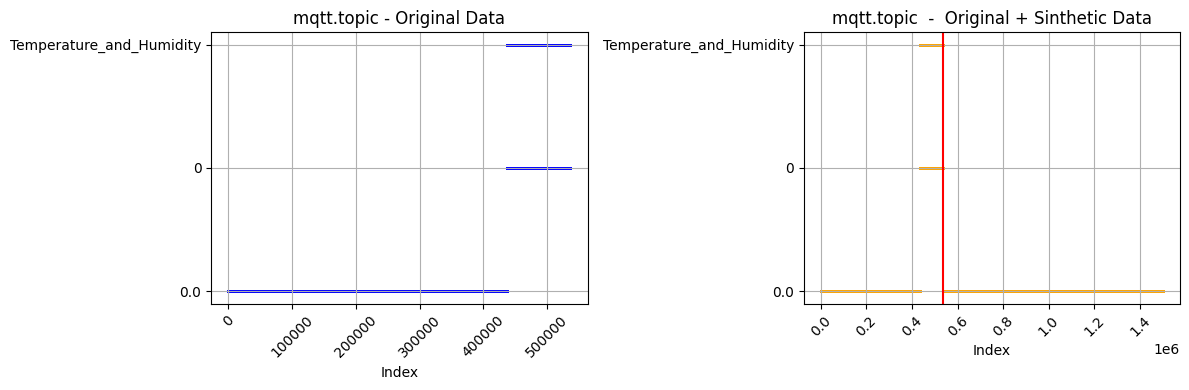

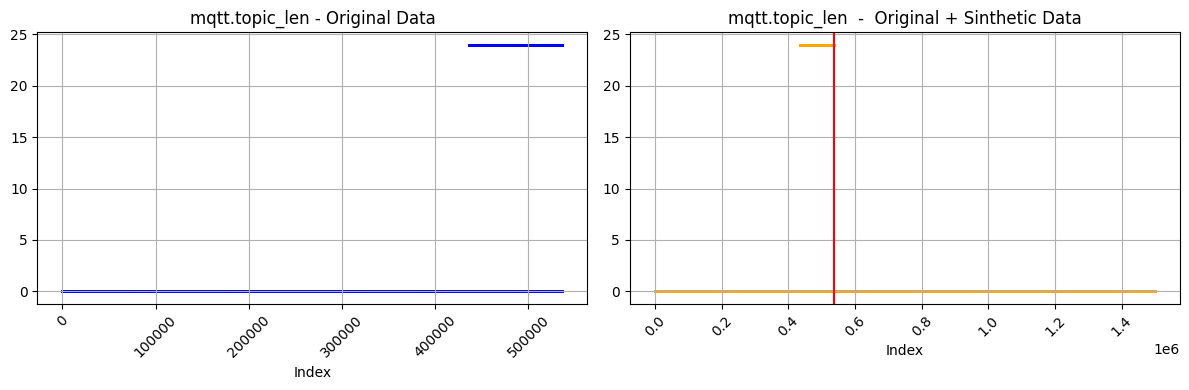

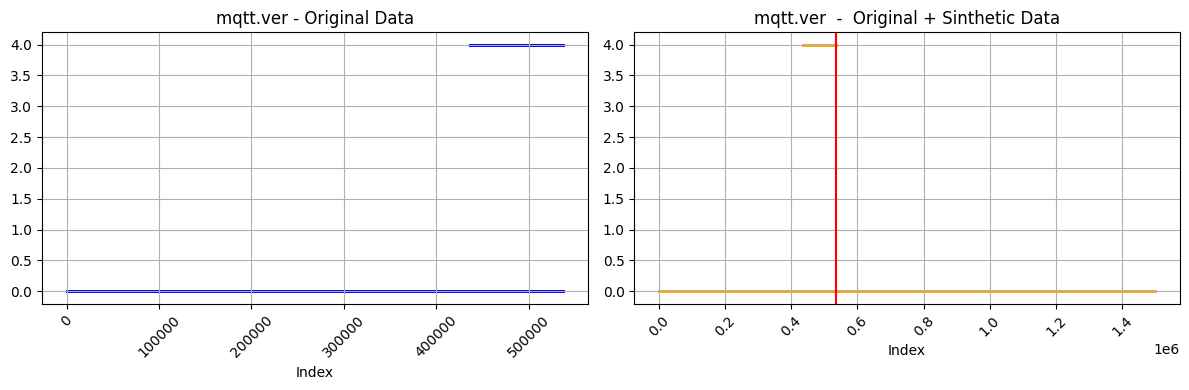

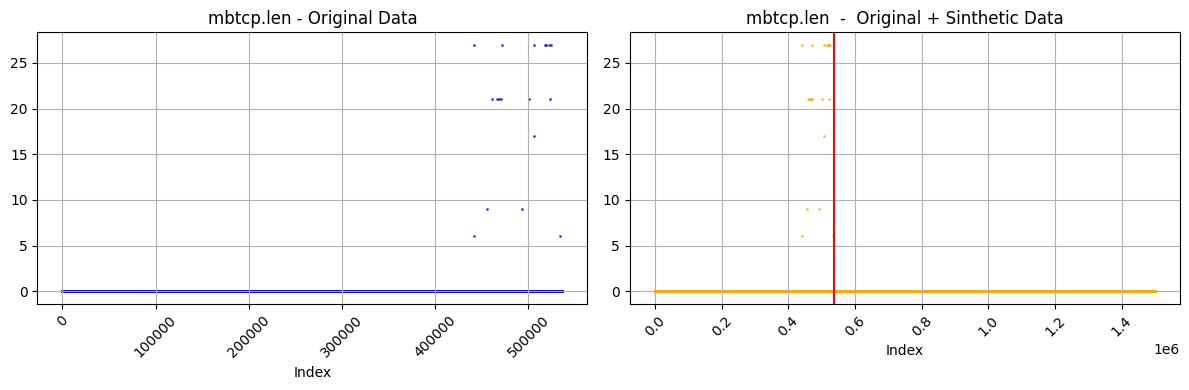

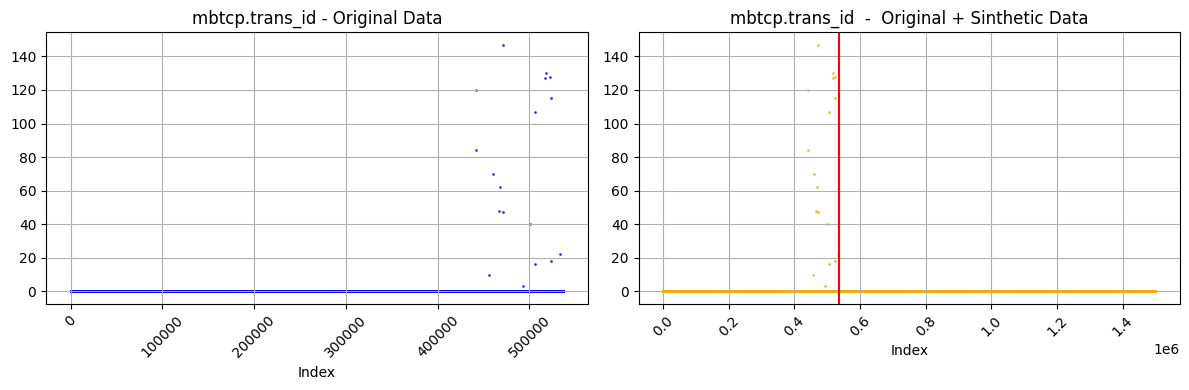

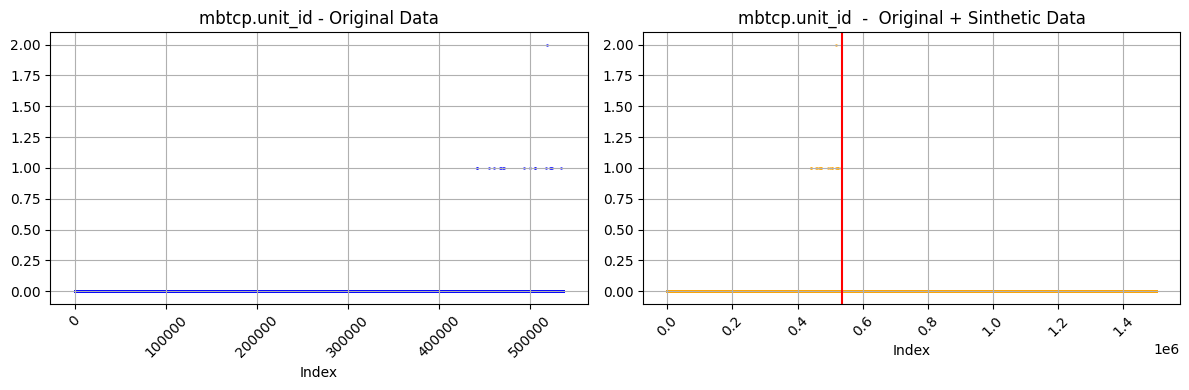

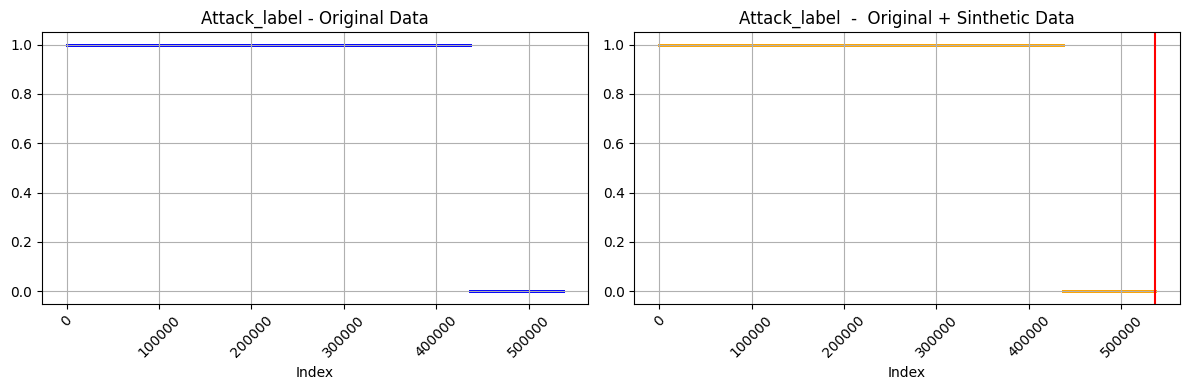

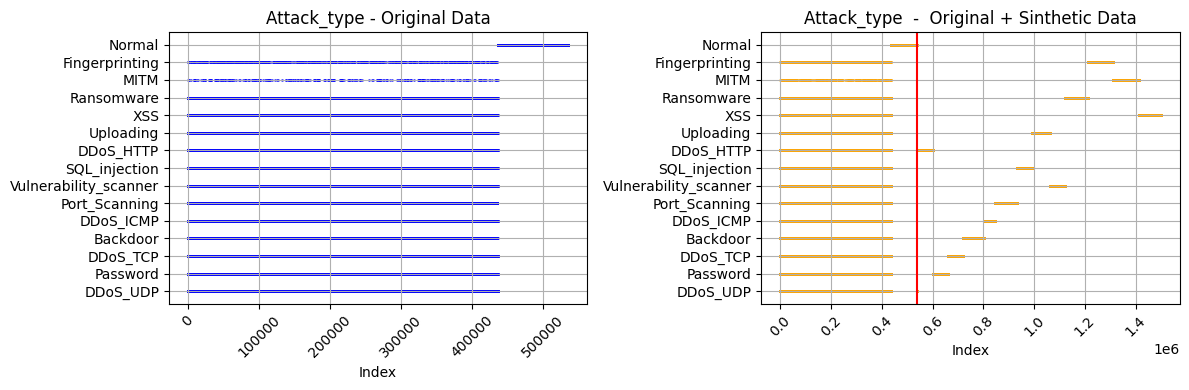

In [7]:
def scatter_plots(data1, data2):
    features = data1.columns.intersection(data2.columns)

    for feature in features:
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        # small ball to see the concentration of points
        plt.scatter(data1.index, data1[feature], color='blue', alpha=0.7, label='Dados Originais', s=1)
        # plt.legend(loc='upper right')
        plt.xlabel('Index')
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.title(f'{feature} - Original Data')

        plt.subplot(1, 2, 2)
        plt.scatter(data2.index, data2[feature], color='orange', alpha=0.7, label='Dados Sintéticos', s=1)
        # y axis label
        plt.xlabel('Index')
        # x axis label
        plt.title(f'{feature}  -  Original + Sinthetic Data')
        # plt.legend(loc='upper right')
        plt.grid(True)
        # insert red vertical line in  index number 536515
        plt.axvline(x=536515, color='red')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

scatter_plots(df_original, df_smote)

In [8]:
# Ouliers

def analyze_outliers(data1, data2):
    from sklearn.ensemble import IsolationForest

    clf = IsolationForest(contamination=0.1)
    # filter only numerical columns
    data1 = data1.select_dtypes(include=['float64', 'int64'])
    data2 = data2.select_dtypes(include=['float64', 'int64'])
    
    outliers_data1 = clf.fit_predict(data1)
    outliers_data2 = clf.fit_predict(data2)

    print("Number of outliers in the original data:  ", np.sum(outliers_data1 == -1))
    print("Number of outliers in the synthetic data:", np.sum(outliers_data2 == -1))

analyze_outliers(df_original, df_smote)

ValueError: Input X contains NaN.
IsolationForest does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

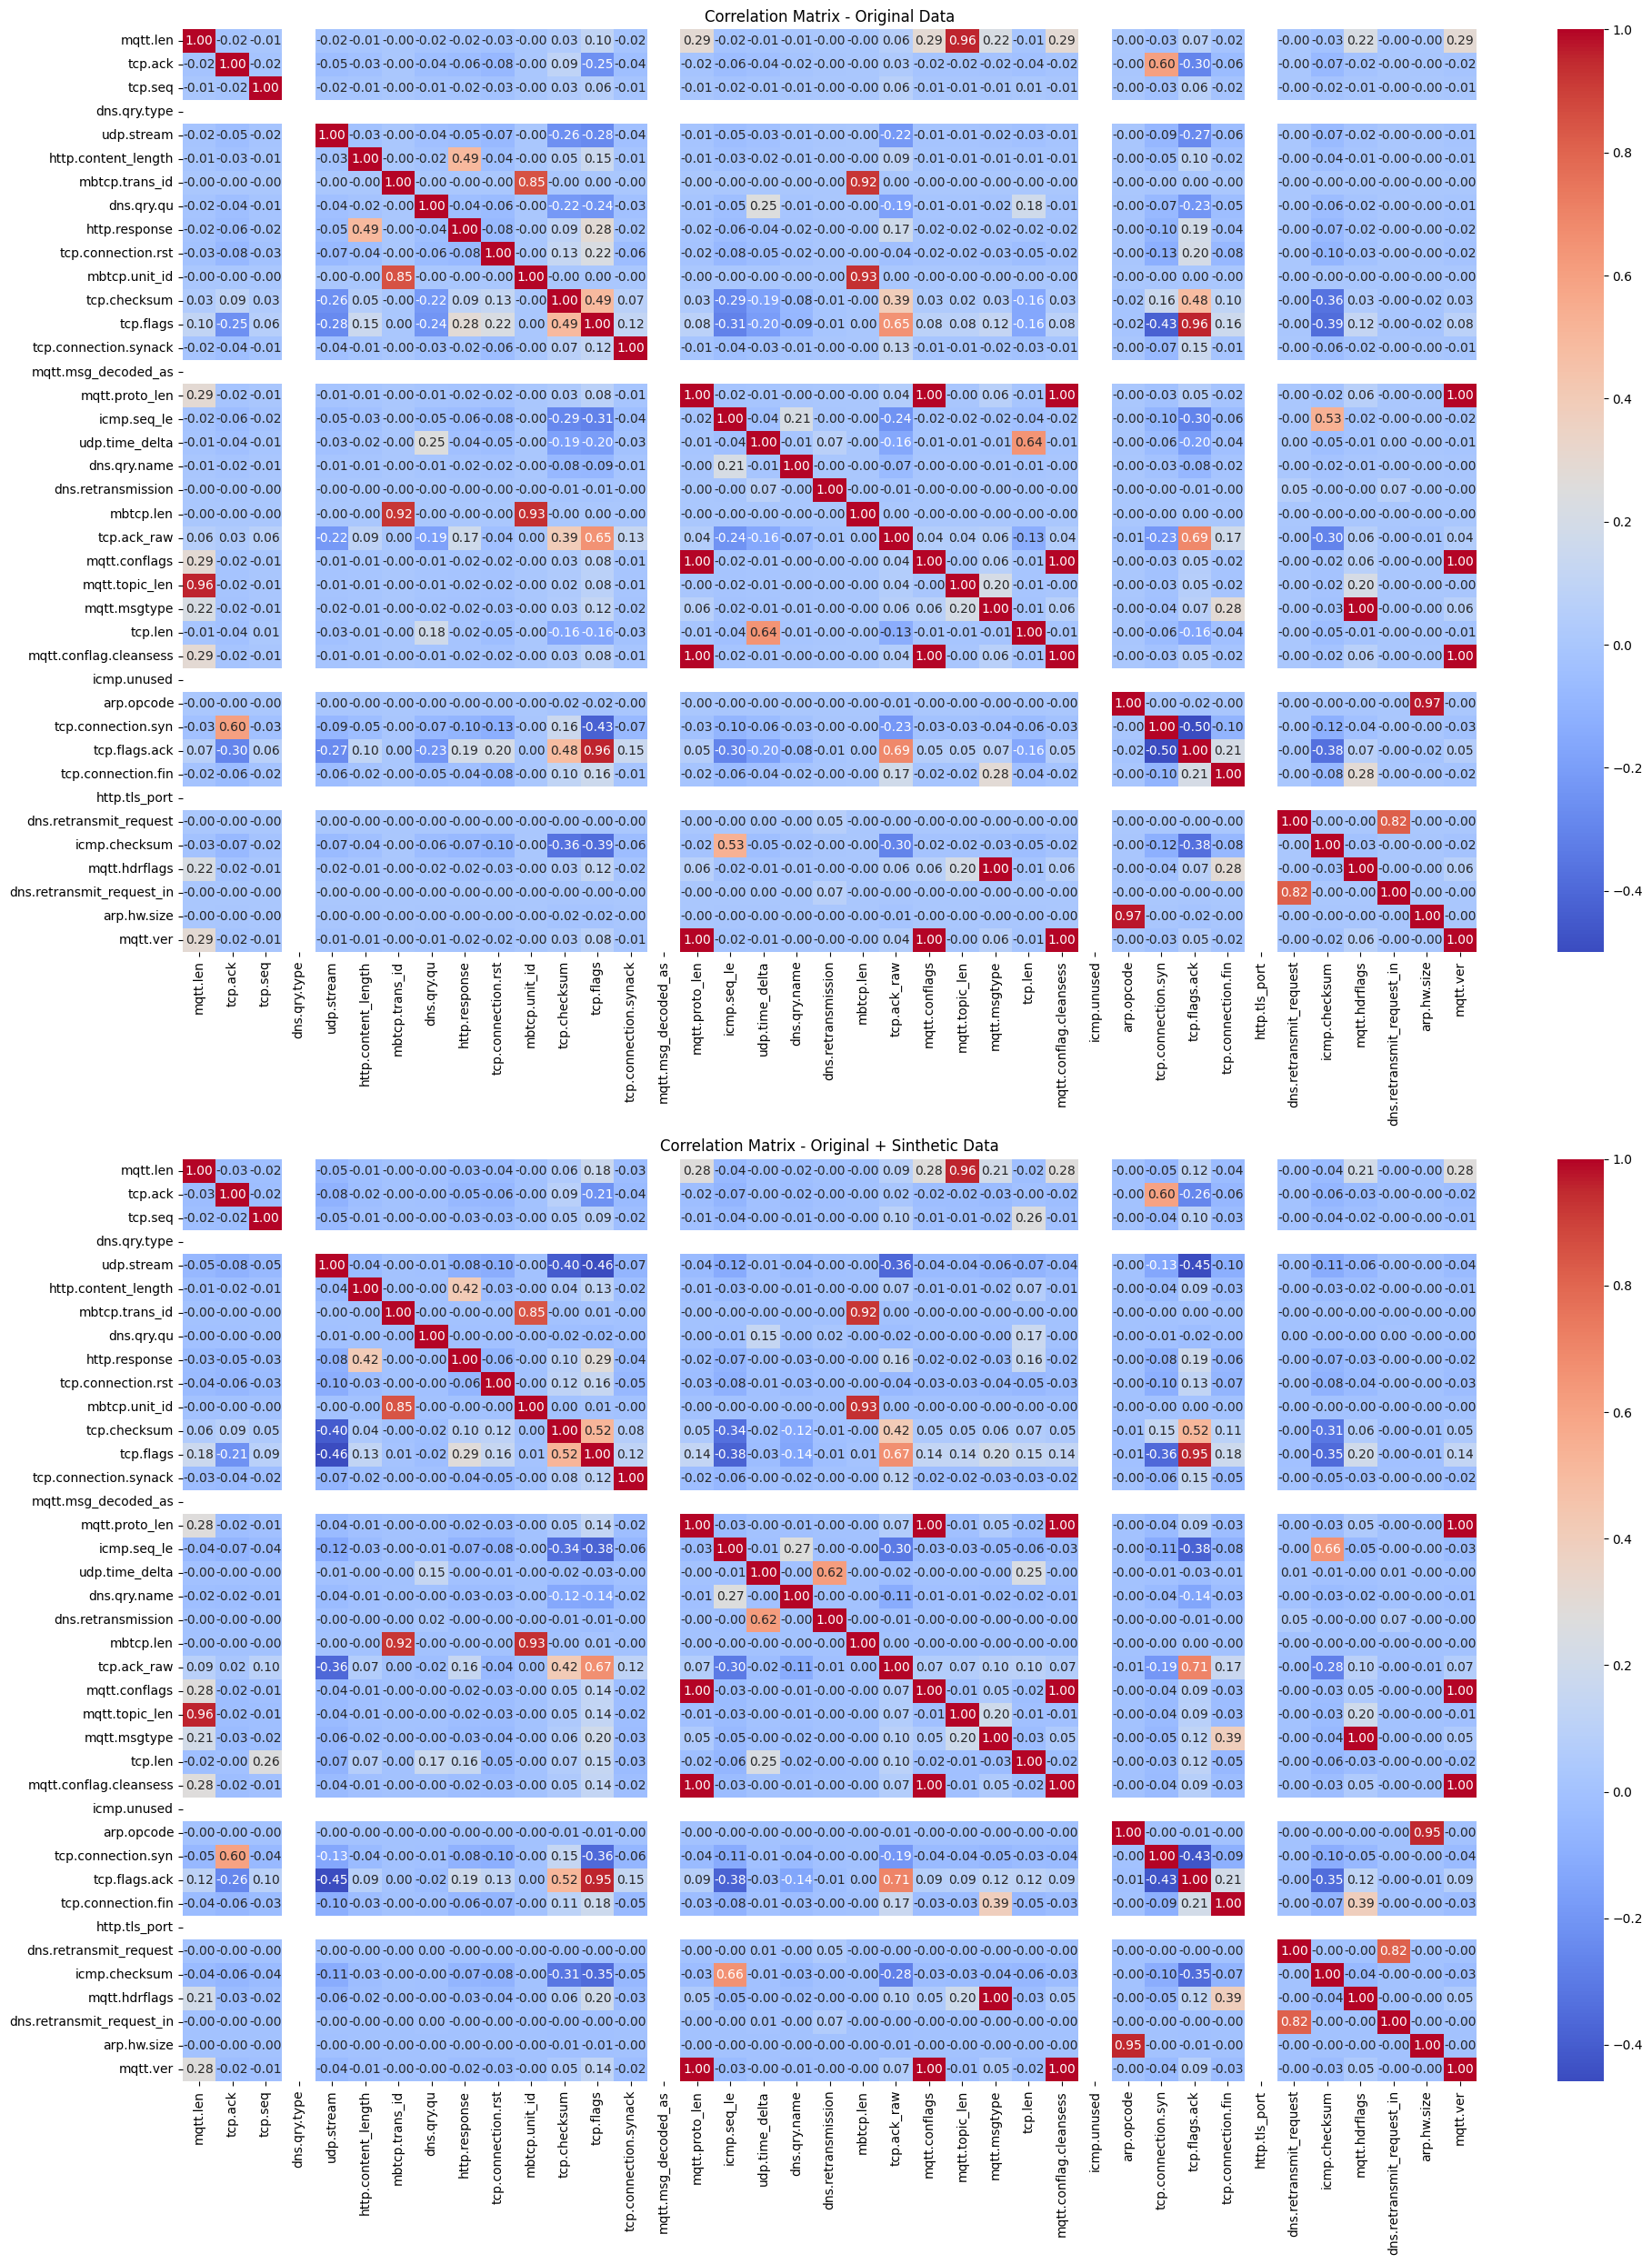

In [ ]:
def correlation_analysis(data1, data2):
    numeric_cols1 = set(data1.select_dtypes(include=np.number).columns)
    numeric_cols2 = set(data2.select_dtypes(include=np.number).columns)
    common_cols = list(numeric_cols1.intersection(numeric_cols2))
    corr_original = data1[common_cols].corr()
    corr_synthetic = data2[common_cols].corr()

    plt.figure(figsize=(20, 25))
    plt.subplot(2,1 , 1)
    sns.heatmap(corr_original, cmap='coolwarm', annot=True,fmt='.2f')
    plt.title("Correlation Matrix - Original Data")

    plt.subplot(2, 1, 2)
    sns.heatmap(corr_synthetic, cmap='coolwarm', annot=True, fmt='.2f')
    plt.title("Correlation Matrix - Original + Sinthetic Data")

    plt.tight_layout()
    plt.show()

correlation_analysis(df_smote, df_original)